<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projeto Proposto 
</h1>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este projeto baseia-se no Estudo das Técnicas de Machine Learning - Regressão. </i>       
</p>  

> CONSULTAR :

https://www.youtube.com/watch?v=J9HuFIYcFWU&list=PLtQM10PgmGogjn0cikgWi8wpQUnV6ERkY&index=2&ab_channel=DiogoCortiz

https://www.youtube.com/watch?v=f_BkhOG4Ofg&list=PLDoqBsM6cBJbHnTpz9T1itfHaxQdhx7b1&index=6&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

https://www.youtube.com/watch?v=ebUxLW9BEEE&list=PLDoqBsM6cBJbHnTpz9T1itfHaxQdhx7b1&index=8&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

https://www.youtube.com/watch?v=PaFPbb66DxQ&list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU&ab_channel=StatQuestwithJoshStarmer


# <font color='red' style='font-size: 40px;'>Library and Data </font>

In [2]:
import pandas as pd 
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import time
import datetime
import plotly.express as px 
import plotly.graph_objects as go
import warnings



%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore') # Remove Warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

<img src = '../Resumo_Estatistica_Matematica//img50.png' width='70%'>

<img src = './img301.png' width='70%'>

# <font color='red' style='font-size: 40px;'>Importando os Dados  </font>

CAMPOS:

- RM: Número médio de cômodos entre os imóveis do bairro.

- LSTAT: Porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

- PTRATIO: Razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

- MEDV: Valor Médio das Casas. 


* Importando os Dados 

In [3]:
df = pd.read_csv('housing.csv')
print(df.shape)
print(df.dtypes)
df.head()

(489, 4)
RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object


,RM,LSTAT,PTRATIO,MEDV
0,6.58,4.98,15.30,504000.00
1,6.42,9.14,17.80,453600.00
2,7.18,4.03,17.80,728700.00
3,7.00,2.94,18.70,701400.00
4,7.15,5.33,18.70,760200.00


# <font color='red' style='font-size: 40px;'>Análise Exploratória  </font>

* Conferindo Dados Nulos 

In [4]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

* Estatística Descritiva 

In [5]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.00,489.00,489.00,489.00
mean,6.24,12.94,18.52,454342.94
std,0.64,7.08,2.11,165340.28
min,3.56,1.98,12.60,105000.00
25%,5.88,7.37,17.40,350700.00
50%,6.18,11.69,19.10,438900.00
75%,6.58,17.12,20.20,518700.00
max,8.40,37.97,22.00,1024800.00


* Análise de Outliers 

In [6]:
def plota_histograma(data, feature):

    mediana = data[feature].median()
    media = round(data[feature].mean(), 2)

    plt.figure(figsize = (10,5))
    sns.histplot(data = data, x = feature, kde = True, stat = 'probability', color = '#1FB3E5')
    plt.title(f'Distribuição {feature}', fontsize = 16)
    plt.xlabel('Intervalo de Valores', fontsize = 14)
    plt.ylabel('Frequência', fontsize = 14)
    plt.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
    plt.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
    plt.box(False)
    plt.legend(loc = 'best')
    plt.show()

def plota_boxplot(data, feature):
    plt.figure(figsize = (10,5))
    sns.boxplot(data = data, x = feature, orient = 'h', color = '#1FB3E5')
    plt.title(f'Boxplot {feature}', fontsize = 16)
    plt.xlabel('Intervalo de Valores', fontsize = 14)
    plt.box(False)
    plt.legend(loc = 'best')
    plt.show()
    

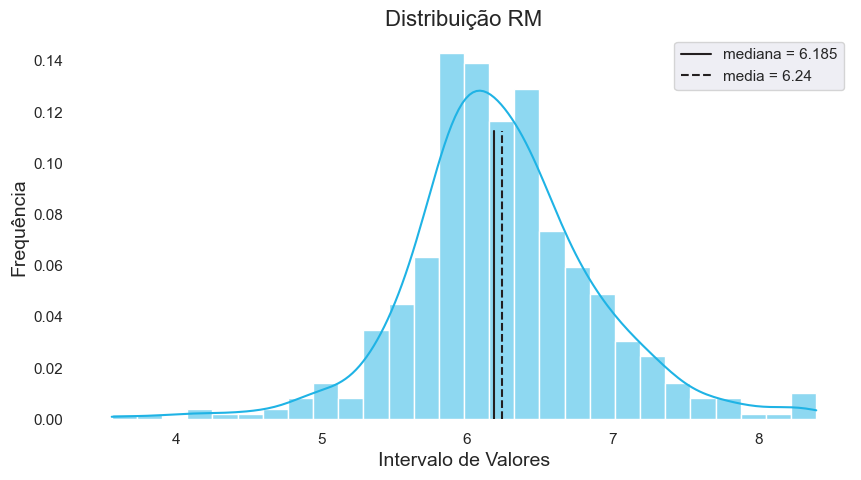

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


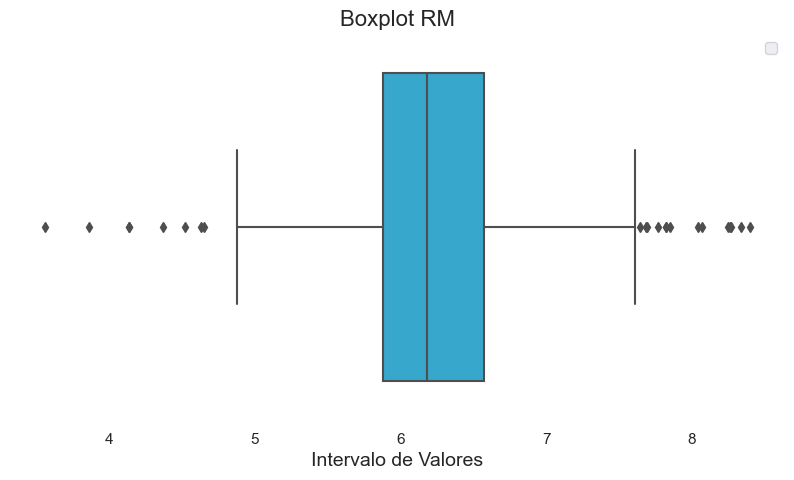

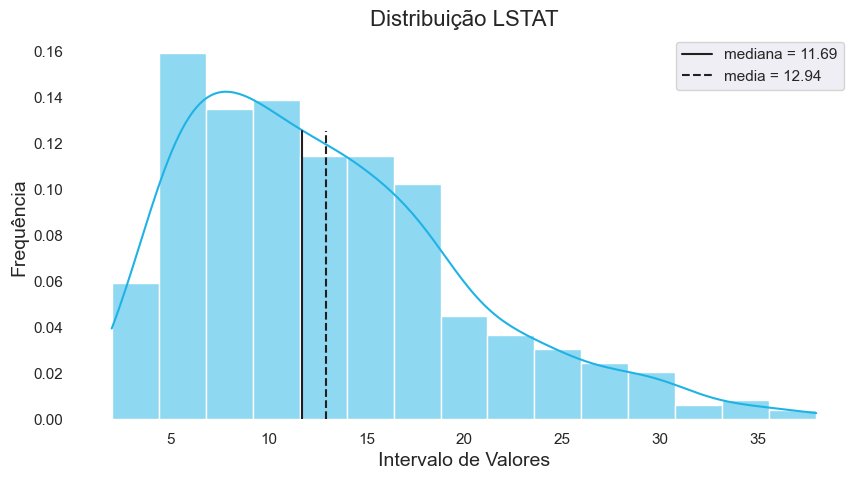

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


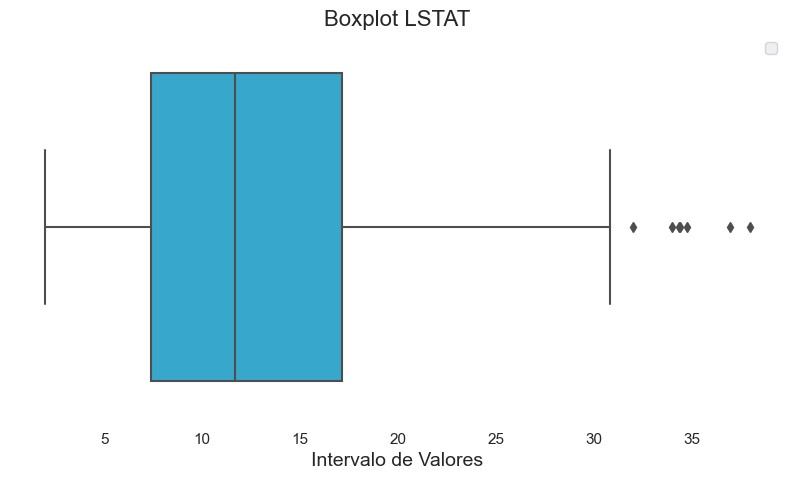

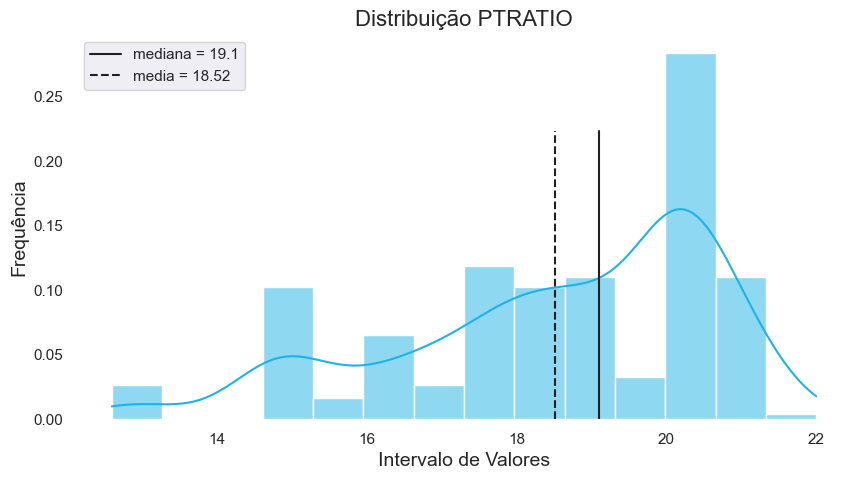

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


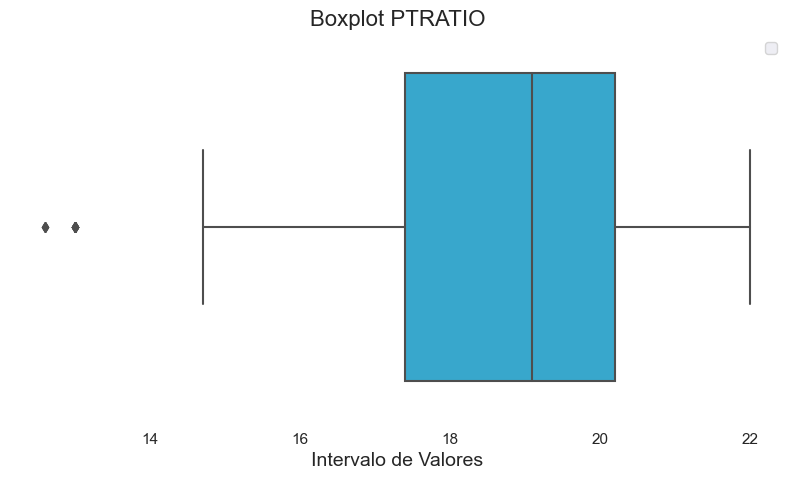

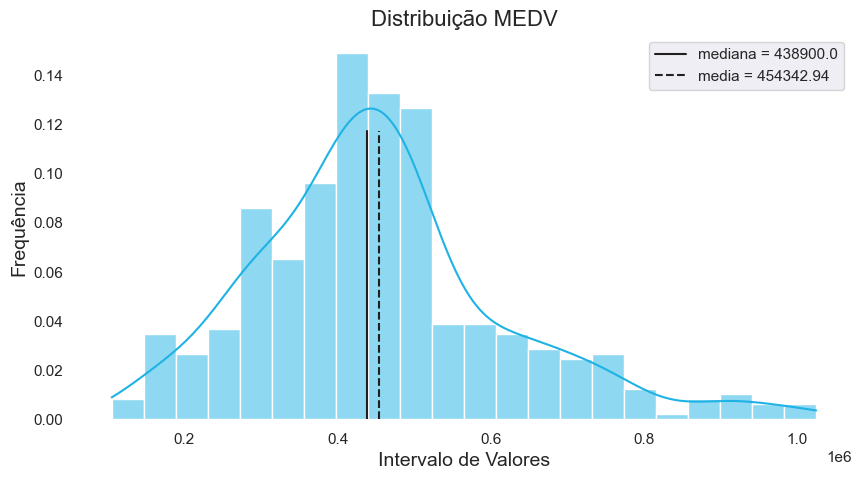

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


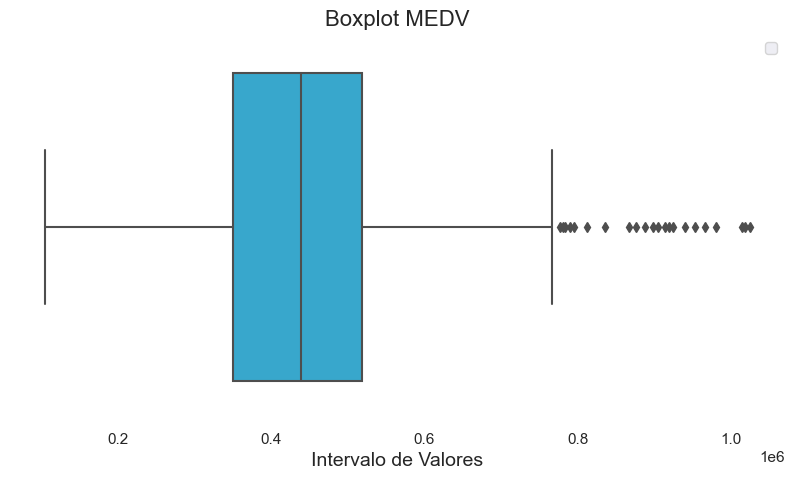

In [7]:
for feature in df.columns:
    plota_histograma(df, feature)
    plota_boxplot(df, feature)

# <font color='red' style='font-size: 40px;'>1.0 Tipos de Correlação </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Introdução sobre Conceitos de Correlação.</i>     
</p>    


<hr>

> CONSULTAR: 

https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb

https://universidadedosdados.medium.com/multicollinearity-is-not-correlation-38014cbfc710

## 1.1) Correlação de Pearson

### 1. O que é?

> 1. A correlação de Pearson avalia a relação linear entre duas variáveis contínuas

> 2. Pode ser um valor entre -1 e 1.

> 3. A correlação de A ~ B é a mesma que B ~ A.

> 4. Correlação mais próxima de 0: Correlação Fraca; Correlação mais próxima de 1: Correlação Forte

> 5. É uma correlação com o teste paramétrico, necessitando de alguns requisitos, como Normalidade.

> 6. Os coeficientes de correlação de Pearson medem somente relações lineares.

### 2. Identificando Visualmente

> 1. Quando a correlação é forte, um gráfico de dispersão terá seus dados arranjados de uma maneira linear ou próxima.

> 2. Quando a correlação é fraca, um gráfico de dispersão terá seus dados muito espalhados.

> 3. Quando a correlação é positiva, significa que a medida que a variável X cresce, Y cresce também.

> 4. Quando a correlação é negativa, significa que a medida que a variável X cresce, Y diminui.

> 5. A correlação pode ser não linear. Neste caso, precisamos montar um modelo matemático não linear.

> 6. Quando os pontos estão mais agrupados, a correlação é forte, quanto estão mais dispersos, ela é moderada.


### 3. Covariância 

> 1. A covariância, ou variância conjunta, é a medida do grau de interdependência (ou inter-relação) numérica entre duas variáveis. É definida da seguinte maneira:


### Covariância populacional

# $$\sigma_{xy} = \frac 1n\sum_{i=1}^{n}(X_i-\mu_x)(Y_i-\mu_y)$$

### Covariância amostral

# $$S_{xy} = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})$$

onde $n$ é o número de pares que foram comparados

### Interpretação da Covariância 

> 1. Valor de $S_{xy}$ positivo indica uma associação linear positiva entre x e y, ou seja, à medida que o valor de x aumenta, o valor de y também aumenta. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes I e III.

> 2. Se o valor de $S_{xy}$ for negativo temos um indicativo de associação linear negativa entre x e y, ou seja, à medida que x aumenta, o valor de y diminui. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes II e IV.

> 3. Finalmente, se os pontos estiverem uniformemente distribuídos pelos quadrantes, o valor de $S_{xy}$ se aproximará de zero, indicando que não existe nenhuma associação linear entre x e y.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img026.png" width=50%>

### 4. Cálculo do Coeficiente de Pearson 

> CONSULTAR:

https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb

> 1. É obtido dividindo-se a covariância da população ou amostra pelo produto do desvio padrão populacional ou amostral de x pelo desvio padrão populacional ou amostral de y.

> 2. O coeficiente de correlação varia de -1 a +1. Valores que se aproximam de -1 ou +1 indicam uma relação linear forte. Quanto mais próxima a correlação estiver de zero, mais fraca será a relação.

> 3. Um ponto importante é que o coeficiente de correlação é uma medida de associação linear e não necessariamente de causação. Uma correlação alta entre duas variáveis não significa, necessariamente, que variações em uma delas provocará alterações na outra.

> 4. A Correlação Linear através do Coeficiente de Pearson pressupõe Normalidade dos dados e que ambas variáveis sejam variáveis contínuas.


### Coeficiente de correlação de Pearson - dados populacionais

# $$\rho = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}} = \frac {\sum_{i=1}^{n}(X_i-\mu_x)(Y_i-\mu_y)} {{(n)}{\sigma_{x}\sigma_{y}}}$$


### Coeficiente de correlação de Pearson - dados amostrais

# $$r = \frac{s_{xy}}{s_{x}s_{y}} = \frac {\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})} {{(n-1)}{s_{x}s_{y}}}$$


Onde

$\sigma_{xy}$ = covariância populacional entre x e y

$s_{xy}$ = covariância amostral entre x e y

$\sigma_{x}$ e $\sigma_{y}$ = desvios padrão populacionais de x e y, respectivamente

$s_{x}$ e $s_{y}$ = desvios padrão amostrais de x e y, respectivamente


### 5. Correlação e Causalidade

> CONSULTAR: 

https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb

https://universidadedosdados.medium.com/multicollinearity-is-not-correlation-38014cbfc710

> 1. Correlação não significa que exista Causalidade.

> 2. Correlação são duas variáveis interligadas matemáticamente.

> 3. Causalidade são duas variáveis que, por acaso, aparentam estar ligadas, mas não estão.

### 6. Teste de Hipótese para o Coeficiente de Correlação de Pearson

> 1. É um teste paramétrico.

# $$ t = \frac {r}{\sigma_{r}} = \frac {r} {\sqrt{\frac {1-{r}^2} {n - 2} }}$$

$gl$ = n - 2 = graus de liberdade

### 7. Correlação NÃO significa Multicolinearidade

> CONSULTAR: 

https://www4.eco.unicamp.br/docentes/gori/images/arquivos/EconometriaI/Econometria_Cap10_Multicolinearidade.pdf

https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb

https://universidadedosdados.medium.com/multicollinearity-is-not-correlation-38014cbfc710

https://www.youtube.com/watch?v=ebUxLW9BEEE&list=PLDoqBsM6cBJbHnTpz9T1itfHaxQdhx7b1&index=9&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

> 1. Multicolinearidade 

* Multicolinearidade é quando um de nososs preditores pode ser prevista através de 1 ou mais variáveis preditoras.

* Para analisarmos a Multicolinearidade, utiliza-se o Variance Inflation Factor (VIF). Matematicamente, essa métrica é igual à razão entre a variância do modelo e a variância de um modelo que inclui apenas aquela única variável independente.

* Analise de Variância 

<img src = './img380.png' width = '70%'>

# $$ VIF_j = \frac {1} {1 - {R_j}^2} $$

> 2. Interpretação dos Resultados

* VIF = 1 --> Sem Multicolinearidade

* 5 => VIF > 1 --> Média Multicolinearidade. Não é um grande problema deixar a variável

* VIF > 5 --> Existe uma Grande Multicolinearidade e deve-se remover a variável do Modelo de Regressão

> 3. Considerações Finais

<img src = './img381.png' width = '70%'>

* Definitivamente não é bom termos Multicolinearidade, entretanto, caso haja, não significa que o modelo não funcione mais.

* A Multicolinearidade aumenta os resíduos, tirando a confiança dos coeficientes de nossa Regressão, entretanto, nossa previsão ainda pode estar intacta, portanto, dependerá de caso a caso. 


## 1.2) Correlação de Spearman

> CONSULTAR: 

https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb

https://universidadedosdados.medium.com/multicollinearity-is-not-correlation-38014cbfc710

### 1. O que é?

> 1. A correlação de Spearman avalia a relação monotônica entre duas variáveis contínuas ou ordinais. Em uma relação monotônica, as variáveis tendem a mudar juntas mas não necessariamente a uma taxa constante. O coeficiente de correlação de Spearman baseia-se nos valores classificados de cada variável, em vez de os dados brutos. 

> 2. A correlação de Spearman é muito usada para avaliar relações envolvendo variáveis ordinais. Por exemplo, você poderia usar a correlação de Spearman para avaliar se a ordem na qual os funcionários executam um teste está relacionada ao número de meses de emprego.

> 3. Gera um número que varia de -1 a +1. Quanto mais próximo dos extremos (-1 ou 1), maior é a força da correlação. Já os valores próximos de 0 implicam em correlações mais fracas ou inexistentes.

> 4. Medida de força da relação entre duas variáveis. Utiliza os postos de entradas de amostras de dados pareados.

> 5. Pode ser usado na relação de dados lineares e não lineares, assim como também para dados no nível ordinal.

> 6. É utilizado em dados não paramétricos.

### 2. Cálculo do Coeficiente de Spearman

> CONSULTAR:

https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb

# $$r_r = 1 - \frac {6{\sum_{i=1}^{n}}{d_i}^2} {n({n^2}-1)}$$

$n$ = número de amostras

$di$ = diferença de alcance de cada elemento





## 3.1) Correlação de Kendall

> CONSULTAR: 

https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb

https://universidadedosdados.medium.com/multicollinearity-is-not-correlation-38014cbfc710

### 1. O que é?

> 1. Teste não paramétrico indicado para número pequeno de amostras ou para populações com grandes quantidade de empates ( valores repetidos).

> 2. Pode ser utilizado juntamente com o Spearman para comparação.

> 3. É mais conservador que o teste de Spearman.

> 4. É utilizado para amostras com menos de 30 registros.

### 2. Cálculo do Coeficiente de Kendall

> CONSULTAR:

https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb

# $$ k = \frac {(c-nc)} {\frac {n(n-1)}{2}}$$

$c$ = qtd de paresconcordantes

$nc$ = qtd de pares não concordantes

> 1. Sendo concordantes: se xi > xj, então yi > yj 

> 2. Sendo não concordantes: se xi > xj, então yi < yj


* Análise de Dispersão 

Index(['RM', 'LSTAT', 'PTRATIO'], dtype='object')


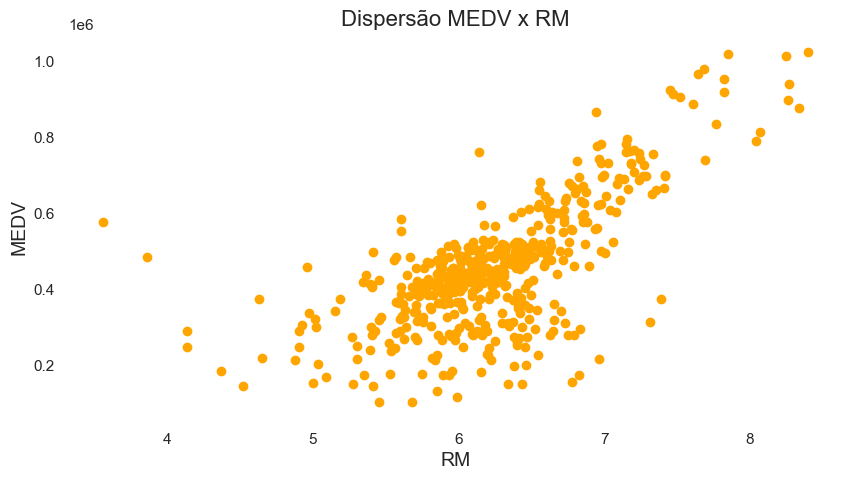

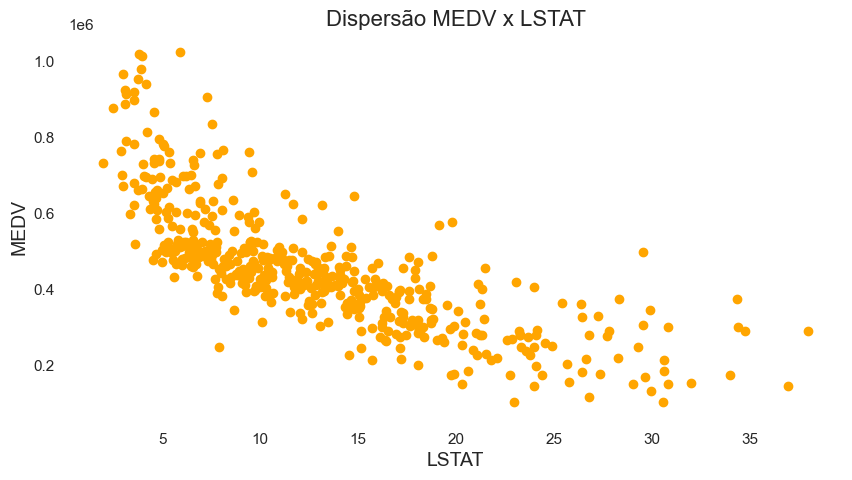

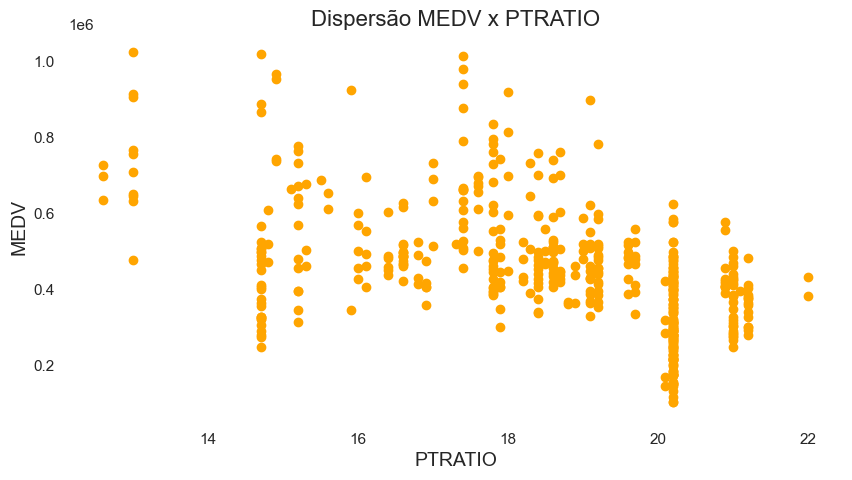

In [8]:
def plota_dispersao(data, variavel_predita, variavel_preditora):
    plt.figure(figsize = (10,5))
    plt.scatter(y = data[variavel_predita], x = data[variavel_preditora], color = 'orange')
    plt.title(f'Dispersão {variavel_predita} x {variavel_preditora}', fontsize = 16)
    plt.xlabel(f'{variavel_preditora}', fontsize = 14)
    plt.ylabel(f'{variavel_predita}', fontsize = 14)
    plt.box(False)
    plt.show()

variaveis_preditoras = df.columns[:3]
print(variaveis_preditoras)
for variavel in variaveis_preditoras:
    plota_dispersao(df, 'MEDV', variavel)

* Análise da Normalidade 

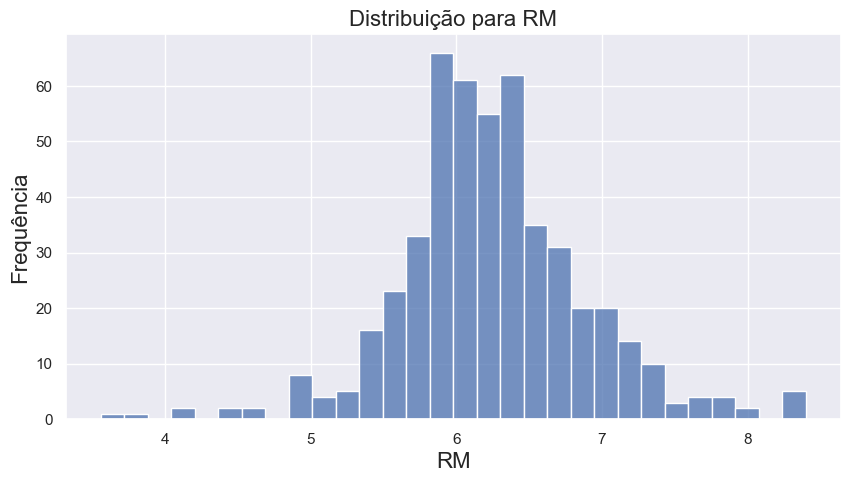

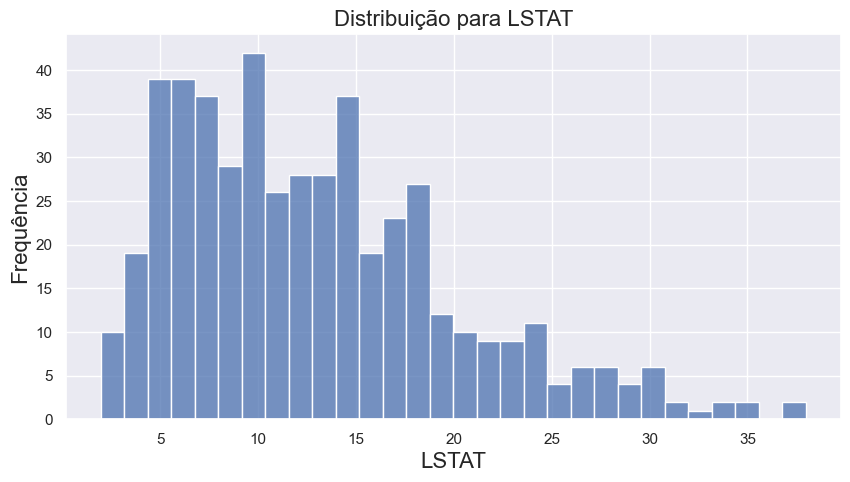

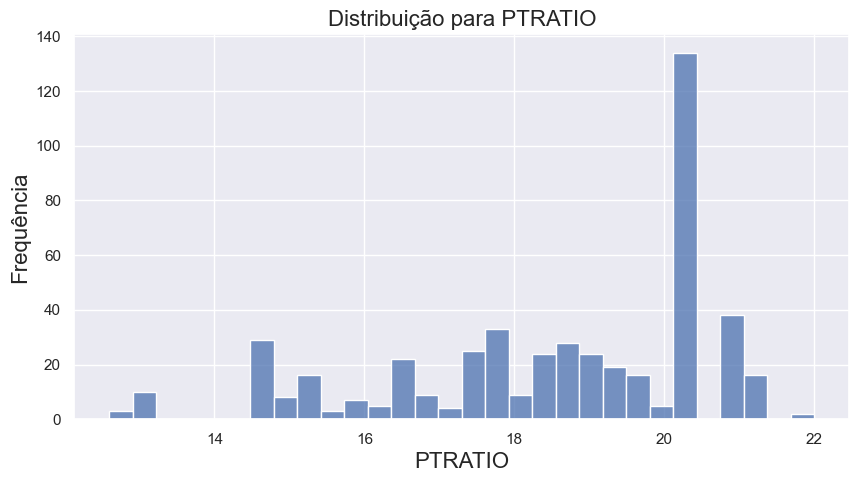

In [9]:
def plota_histograma(data, variavel_preditora, n_bins):
    sns.histplot(data = data, x = variavel_preditora, bins = n_bins)
    plt.title(f'Distribuição para {variavel_preditora}', fontsize = 16)
    plt.xlabel(f'{variavel_preditora}', fontsize = 16)
    plt.ylabel(f'Frequência', fontsize = 16)
    plt.show()

for variavel in variaveis_preditoras:
    plota_histograma(df, variavel, 30)

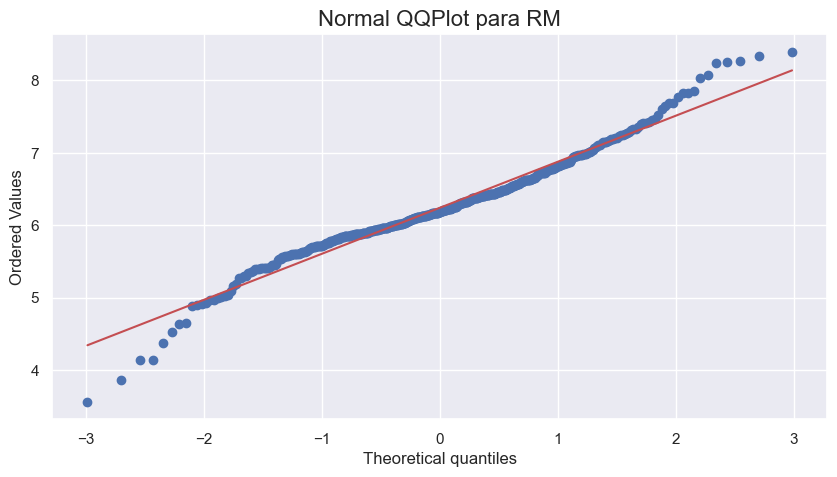

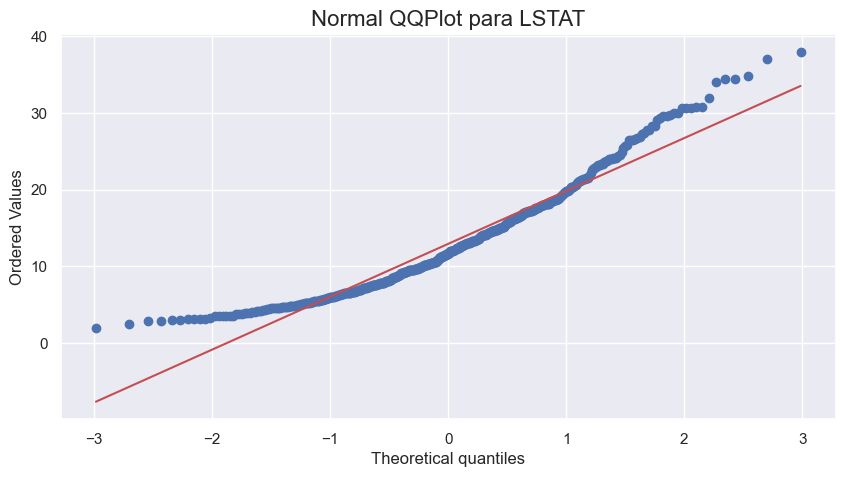

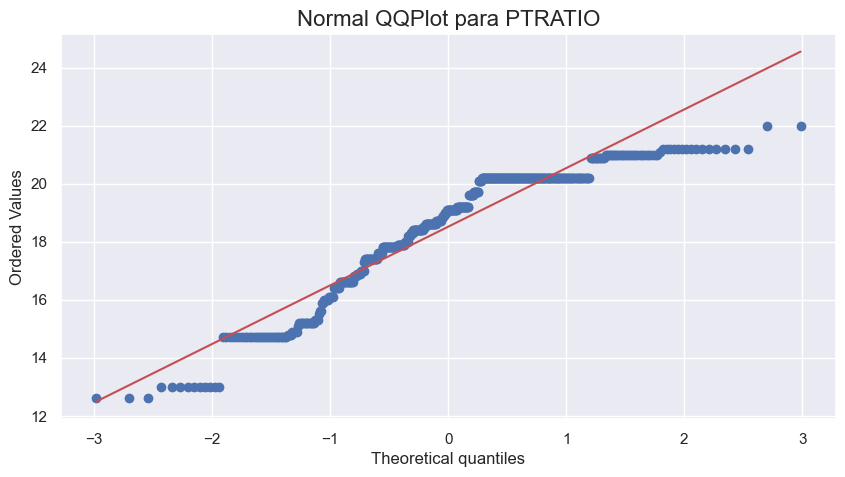

In [10]:
def plota_qqplot(data, variavel_preditora):
    stats.probplot(data[variavel_preditora], plot = plt)
    plt.title(f'Normal QQPlot para {variavel_preditora}', fontsize = 16)
    plt.show()
    
for variavel in variaveis_preditoras:
    plota_qqplot(df, variavel)


> TESTE DE SHAPIRO WILK (ATÉ 5000 Amostras)

H0 = Distribuição Normal --> p_value > 0.05

H1 = Distribuição Não Normal --> p_value <= 0.05

> TESTE DE LILLIEFORS/KOLMOGOROV_SMINORV (Quantas Amostras Tiverem)

H0 = Distribuição Normal --> p_value > 0.05

H1 = Distribuição Não Normal --> p_value <= 0.05

In [11]:
from statsmodels.stats.diagnostic import lilliefors
def analisa_normalidade_matematicamente(data, variavel_preditora):
    estatistica, p_value = stats.shapiro(data[variavel_preditora])
    if p_value > 0.05:
        print(f'Shapiro Wilk {variavel_preditora}: {round(p_value, 3)} -> Distribuição Normal')
        print()
    else:
        print(f'Shapiro Wilk {variavel_preditora}: {round(p_value, 3)} -> Distribuição Não é Normal')
        print()

    estatistica, p_value = statsmodels.stats.diagnostic.lilliefors(data[variavel_preditora])
    if p_value > 0.05:
        print(f'Kolmogorov {variavel_preditora}: {round(p_value, 3)} -> Distribuição Normal')
        print()
    else:
        print(f'Kolmogorov {variavel_preditora}: {round(p_value, 3)} -> Distribuição Não é Normal')
        print()

for variavel in variaveis_preditoras:
    analisa_normalidade_matematicamente(df, variavel)

Shapiro Wilk RM: 0.0 -> Distribuição Não é Normal

Kolmogorov RM: 0.001 -> Distribuição Não é Normal

Shapiro Wilk LSTAT: 0.0 -> Distribuição Não é Normal

Kolmogorov LSTAT: 0.001 -> Distribuição Não é Normal

Shapiro Wilk PTRATIO: 0.0 -> Distribuição Não é Normal

Kolmogorov PTRATIO: 0.001 -> Distribuição Não é Normal



> 1. Pelo fato das variáveis não terem Distribuição Normal, devemos utilizar uma Correlação que não seja de Pearson 

* Análise de Correlação 

> PEARSON (DISTRIBUIÇÃO NORMAL)

> SPEARMAN (DISTRIBUIÇÃO NÃO NORMAL)

H0 : Não há correlação linear --> p_value > 0.05

H1 : Há correlação linear --> p_value <= 0.05

Coeficiente de Correlação: 0.6240572939087419
Correlação de Spearman RM e MEDV: p-value = 0.0 -> Há Correlação

Coeficiente de Correlação: -0.8455267494054259
Correlação de Spearman LSTAT e MEDV: p-value = 0.0 -> Há Correlação

Coeficiente de Correlação: -0.5592761164167335
Correlação de Spearman PTRATIO e MEDV: p-value = 0.0 -> Há Correlação



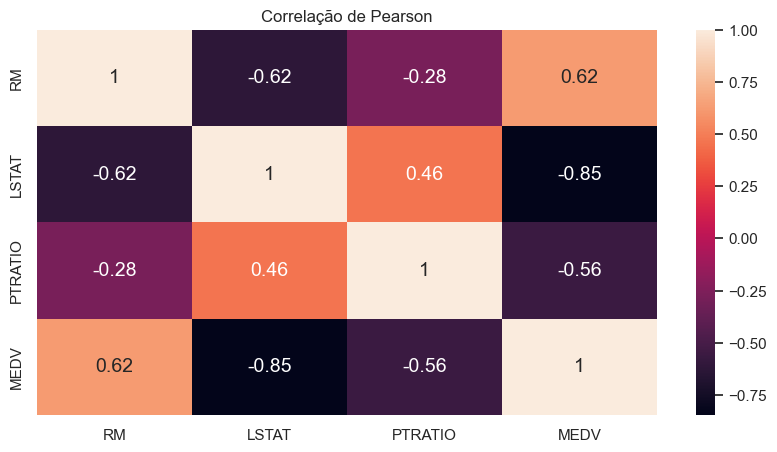

In [12]:
def correlacao_pearson(data, variaveis_preditoras, variavel_predita):
    for variavel_preditora in variaveis_preditoras:
        coef, p_value = stats.pearsonr(data[variavel_preditora], data[variavel_predita])
        if p_value > 0.05:
            print(f'Coeficiente de Correlação: {coef}')
            print(f'Correlação de Pearson {variavel_preditora} e {variavel_predita}: p-value = {round(p_value, 3)} -> Não há Correlação')
            print()
        else:
            print(f'Coeficiente de Correlação: {coef}')
            print(f'Correlação de Pearson {variavel_preditora} e {variavel_predita}: p-value = {round(p_value, 3)} -> Há Correlação')
            print()
    correlacao = data.corr(method='pearson')
    plt.figure()
    sns.heatmap(correlacao, annot = True)
    plt.title('Correlação de Pearson')
    plt.show()

def correlacao_spearman(data, variaveis_preditoras, variavel_predita):

    for variavel_preditora in variaveis_preditoras:
        coef, p_value = stats.spearmanr(data[variavel_preditora], data[variavel_predita])
        if p_value > 0.05:
            print(f'Coeficiente de Correlação: {coef}')
            print(f'Correlação de Spearman {variavel_preditora} e {variavel_predita}: p-value = {round(p_value, 3)} -> Não há Correlação')
            print()
        else:
            print(f'Coeficiente de Correlação: {coef}')
            print(f'Correlação de Spearman {variavel_preditora} e {variavel_predita}: p-value = {round(p_value, 3)} -> Há Correlação')
            print()
    correlacao = data.corr(method='spearman')
    plt.figure()
    sns.heatmap(correlacao, annot = True)
    plt.title('Correlação de Pearson')
    plt.show()

correlacao_spearman(df, variaveis_preditoras, 'MEDV')

# <font color='red' style='font-size: 40px;'>3.0 Regressão Linear   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Introdução sobre Conceitos de Regressão Linear.</i>     
</p>    


<hr>

> 1. Y e Ŷ (Y real e Y previsto, respectivamente).

## 3.1) Regressão Linear

> CONSULTAR:

https://medium.com/@lauradamaceno/regress%C3%A3o-linear-6a7f247c3e29

https://medium.com/data-hackers/como-funciona-uma-regress%C3%A3o-linear-f7208fa6c662

https://www.obaricentrodamente.com/2010/07/regressao-linear.html

https://estatsite.com.br/2019/10/17/derivando-os-parametros-de-uma-regressao-linear-simples/

https://www.youtube.com/watch?v=f_BkhOG4Ofg&list=PLDoqBsM6cBJbHnTpz9T1itfHaxQdhx7b1&index=6&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

> 1. A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explicativas ou independentes, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

<img src = './img300.png' width = '70%'>

### 3.1.1) Terminologia

> 1. A variável que é prevista é conhecida como variável dependente (*Y*).

> 2. A variável utilizada para prever o valor da variável dependente é conhecida como variável independente (*X*).


### 3.1.2) Função consumo

> 1. Um economista famoso do passado concluiu em um de seus estudos que os indivíduos tendem a aumentar o seu consumo conforme sua renda aumenta. Logicamente esta teoria ganhou um pouco mais de complexidade, mas vamos utilizar sua forma mais simples para entender o procedimento de análise de regressão com a seguninte formulação:

# $$Y_i = \beta_0 + \beta_1X_i$$

Onde

- $Y_i$ é o gasto das famílias ou consumo das famílias

- $X_i$ é a renda disponível

- $\beta_0$ é conhecido como intercepto (no modelo teórico acima é conhecido como consumo autônomo, ou seja, o consumo quando o rendimento é zero)

- $\beta_1$ é o coefiente angular (no modelo teórico é a propensão marginal a consumir)

> 1. Em uma análise de regressão linear simples, o interesse está em estimar a função de regressão populacional como a apresentada acima, ou seja, estimar os valores dos parâmetros $\beta_0$ e $\beta_1$ com base nas observações de $Y$ e $X$.

### 3.1.3) Função de regressão populacional

> 1. A equação formulada acima é conhecida como **função de regressão populacional (FRP)** e em alguns livros é também representada da seguinte forma:

# $$E(Y|X_i) = \beta_0 + \beta_1X_i$$

> 2. Ela afirma que o valor esperado da distribuição de $Y$, dado $X_i$, tem uma relação funcional com $X_i$, isto é, a resposta média de $Y$ varia com $X$. O coeficientes $\beta_0$ e $\beta_1$ são conhecidos como coeficientes de regressão e também são conhecidos como intercepto e coeficiente angular, respectivamente.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img027.png" width=50%>

> 3. O gráfico de dispersão acima deixa claro que com o aumento da renda familiar, em média, as despesas de consumo das famílias aumentam, mas não no mesmo nível. O que podemos dizer é que para um nível de renda $X_i$ as despesas médias de consumo de uma
família agrupam-se em torno do consumo médio de todas as famílias deste nível $X_i$, isto é, em torno de sua esperança condicional $E(Y|X_i)$. Portanto, podemos expressar o desvio individual de $Y_i$ em torno de seu valor esperado da seguinte forma:

# $$u_i = Y_i - E(Y|X_i)$$

> ou

# $$Y_i = E(Y|X_i) + u_i$$

> onde o desvio $u_i$ é uma variável aleatória não-observável que assume valores positivos ou negativos. Esta variável é também cohecida como termo de erro estocástico.

> Observe que a podemos representar a FRP em sua forma estocástica da seguinte maneira:

# $$Y_i = \beta_0 + \beta_1X_i + u_i$$


## 3.2) Resíduos 

> 1. Como vimos anteriormente, o resíduo da i-ésima observação é a diferença entre o valor observado de nossa variável dependente ($Y_i$) e o valor estimado da variável dependente ($\hat{Y}_i$).

# $$\hat{u}_i = Y_i - \hat{Y}_i$$

> 2. Em outras palavras, $\hat{u}_i$ é o erro obtido ao se utilizar a equação de regressão estimada para prever o valor da variável dependente.

## 3.3) Método dos Mínimos Quadrados

Considere a seguinte **função de regressão da população (FRP)** para duas variáveis:

# $$Y_i = \beta_0 + \beta_1X_i + u_i$$

Como a **FRP** não pode ser obtida de forma direta, precisamos estimá-la através da **função de regressão amostral (FRA)**.

# $$Y_i = \hat{\beta}_0 + \hat{\beta}_1X_i + \hat{u}_i$$
# $$Y_i = \hat{Y}_i + \hat{u}_i$$

onde $\hat{Y}_i$ é o valor estimado de $Y_i$.

A partir da equação acima podemos expressar o erro da seguinte maneira:

# $$\hat{u}_i = Y_i - \hat{Y}_i$$
# $$\hat{u}_i = Y_i - \hat{\beta}_0 - \hat{\beta}_1X_i$$

A ideia é determinar **FRA** de forma que fique o mais próximo possível do valor observado de $Y$. Intuitivamente uma forma interessante de fazer isso seria determinar **FRA** de maneira que a soma dos resíduos seja a menor possível.

# $$\sum\hat{u}_i = \sum{(Y_i - \hat{Y}_i)}$$

Avaliando a figura abaixo se pode verificar que talvez o critério de minimizar a soma dos resíduos não seja a melhor abordagem para solucionar o problema.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img015.png" width=50%>

O critério de minimização da soma dos resíduos assume que todos os resíduos tem o mesmo peso no somatório, o que nem sempre se comprova. Em nosso exemplo os resíduos $\hat{u}_1$ e $\hat{u}_4$ encontram-se bem mais afastados da **FRA** que $\hat{u}_2$ e $\hat{u}_3$. Isso acarreta na possibilidade de que a soma dos $\hat{u}_i$'s seja bastante pequena e até mesmo nula, mesmo que os resíduos estejam muito dispersos em relação a reta de regressão.

Para evitar tal problema adotou-se o critério de minimização da soma dos quadrados dos resíduos que é conhecido como **Método de Mínimos Quadrados**.

**O objetivo da Estimativa dos Mínimos Quadrados é descobrirmos as incógnitas/coeficientes com a menor variância possível no Erro, ou seja, com a melhor Estimativa possível e menor Erro possível. É através desse método que calculamos os coeficientes de uma Regressão Linear**

# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{Y}_i)^2}$$
# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{\beta}_0 - \hat{\beta}_1X_i)^2}$$

Após um procedimento de diferenciação, algumas simplificações e manipulações algébricas obtemos os **estimadores de mínimos quadrados**. Beta0 é o coeficiente linear e Beta1 é o coeficiente angular da reta.


# $$ \boxed{\hat{\beta}_0 = \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}} $$ 

# $$ \boxed{\hat{\beta}_1 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}} $$

No final, o que desejamos?



## 3.4) Regressão Linear Simples 

> CONSULTAR: 

https://www.obaricentrodamente.com/2010/07/regressao-linear.html

https://estatsite.com.br/2019/10/17/derivando-os-parametros-de-uma-regressao-linear-simples/

https://www.youtube.com/watch?v=f_BkhOG4Ofg&list=PLDoqBsM6cBJbHnTpz9T1itfHaxQdhx7b1&index=7&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

### 1) Motivação

* Supondo que tenhamos 24 observações, poderíamos utilizar a média amostral somada a um erro para inferirmos o nível de colesterol da observação 25, dado um intervalo de confiança de 95%. 

<img src = './img302.png' width = '70%'>
<img src = './img303.png' width = '70%'>
<img src = './img304.png' width = '70%'>
<img src = './img305.png' width = '70%'>
<img src = './img306.png' width = '70%'>
<img src = './img307.png' width = '70%'>

### 2) Fundamentos 

<img src = './img308.png' width = '70%'>
<img src = './img309.png' width = '70%'>
<img src = './img310.png' width = '70%'>
<img src = './img311.png' width = '70%'>
<img src = './img312.png' width = '70%'>

#### Método dos Mínimos Quadrados

<img src = './img313.png' width = '70%'>
<img src = './img314.png' width = '70%'>
<img src = './img315.png' width = '70%'>
<img src = './img316.png' width = '70%'>
<img src = './img317.png' width = '70%'>
<img src = './img318.png' width = '70%'>
<img src = './img319.png' width = '70%'>
<img src = './img320.png' width = '70%'>

#### Método da Máxima Verossimilhança 

<img src = './img321.png' width = '70%'>
<img src = './img322.png' width = '70%'>
<img src = './img323.png' width = '70%'>
<img src = './img324.png' width = '70%'>
<img src = './img325.png' width = '70%'>
<img src = './img326.png' width = '70%'>


#### Avaliação dos Parâmetros da Regressão - ANOVA

<img src = './img327.png' width = '70%'>
<img src = './img328.png' width = '70%'>
<img src = './img329.png' width = '70%'>
<img src = './img330.png' width = '70%'>
<img src = './img331.png' width = '70%'>
<img src = './img332.png' width = '70%'>
<img src = './img333.png' width = '70%'>
<img src = './img334.png' width = '70%'>

#### Avaliação dos Parâmetros da Regressão - Teste T
<img src = './img335.png' width = '70%'>
<img src = './img336.png' width = '70%'>

#### Avaliação a Regressão

<img src = './img337.png' width = '70%'>
<img src = './img338.png' width = '70%'>

#### Análise dos Resíduos - Homocedasticidade e Heterocedasticidade

<img src = './img339.png' width = '70%'>
<img src = './img340.png' width = '70%'>
<img src = './img341.png' width = '70%'>
<img src = './img342.png' width = '70%'>

#### Análise de Outliers - Observação que tem um grande resíduo

<img src = './img343.png' width = '70%'>
<img src = './img344.png' width = '70%'>




* Separação entre Treino e Teste

In [13]:
from sklearn.model_selection import train_test_split
variavel_preditora = df.columns[0]
variavel_predita = df.columns[3]

def separacao_treino_teste(data, variavel_preditora, variavel_predita):

    x_train, x_test, y_train, y_test = train_test_split(data[[variavel_preditora]].values, data[variavel_predita].values, test_size = 0.3, random_state = 42)
    separacao_realizada = [x_train, y_train, x_test, y_test]

    return x_train, x_test, y_train, y_test


x_train = separacao_treino_teste(df, variavel_preditora, variavel_predita)[0]
x_test = separacao_treino_teste(df, variavel_preditora, variavel_predita)[1]
y_train = separacao_treino_teste(df, variavel_preditora, variavel_predita)[2]
y_test = separacao_treino_teste(df, variavel_preditora, variavel_predita)[3]


* Criando Regressão Linear 

In [14]:
from sklearn.linear_model import LinearRegression

def regressao_linear_simples(x_train, x_test, y_train, y_test):
    reg_linear = LinearRegression()
    reg_linear.fit(x_train, y_train)
 
    coef_linear = reg_linear.intercept_
    coef_angular = reg_linear.coef_

    previsoes_treino = reg_linear.predict(x_train)
    previsoes_teste = reg_linear.predict(x_test)

    coef_det_treino = reg_linear.score(x_train, y_train)
    coef_det_teste = reg_linear.score(x_test, y_test)

    residuos = y_test - previsoes_teste


    return coef_linear, coef_angular, previsoes_treino, previsoes_teste, coef_det_treino, coef_det_teste, residuos

print(f'Coeficiente Linear: {regressao_linear_simples(x_train, x_test, y_train, y_test)[0]}')
print(f'Coeficiente Angular: {regressao_linear_simples(x_train, x_test, y_train, y_test)[1]}')
print(f'Coeficiente de Determinação de Treino: {regressao_linear_simples(x_train, x_test, y_train, y_test)[4]}')
print(f'Coeficiente de Determinação Teste: {regressao_linear_simples(x_train, x_test, y_train, y_test)[5]}')


Coeficiente Linear: -674475.3569248029
Coeficiente Angular: [181698.31254184]
Coeficiente de Determinação de Treino: 0.5173431985725768
Coeficiente de Determinação Teste: 0.37356691849360324


In [15]:
#np.linspace(3, 9)

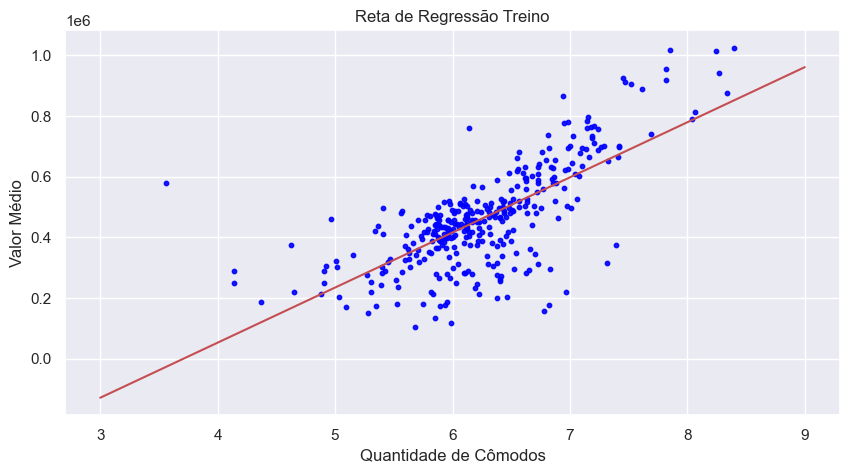

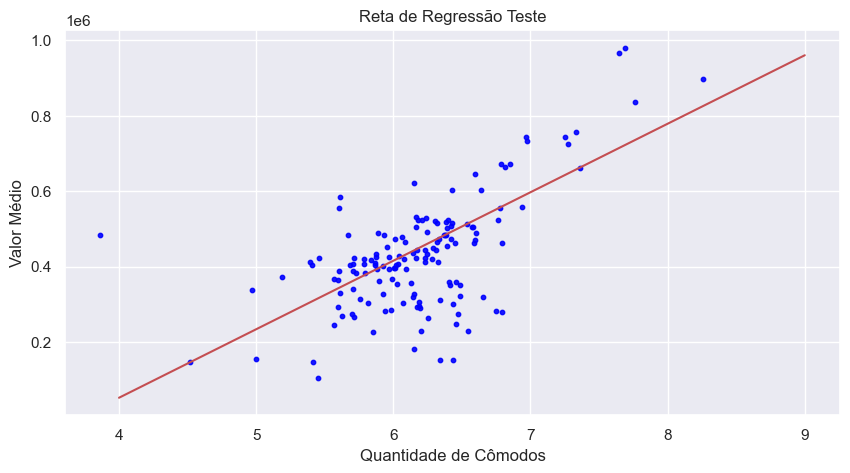

In [16]:
def plota_reta_regressao(tipo_separacao, y, x, start, end, coef_linear, coef_angular):
    plt.scatter(y = y, x = x, color = 'blue', s = 10, alpha = 0.9)
    intervalo_concentracao_qt_comodos = np.linspace(start, end)
    plt.plot(intervalo_concentracao_qt_comodos, coef_linear + intervalo_concentracao_qt_comodos*coef_angular, color = 'r')
    if tipo_separacao == 'treino':
        plt.title('Reta de Regressão Treino')
        plt.xlabel('Quantidade de Cômodos')
        plt.ylabel('Valor Médio')
        plt.show()
    if tipo_separacao == 'teste':
        plt.title('Reta de Regressão Teste')
        plt.xlabel('Quantidade de Cômodos')
        plt.ylabel('Valor Médio')
        plt.show()

plota_reta_regressao('treino', y_train, x_train, 3, 9, regressao_linear_simples(x_train, x_test, y_train, y_test)[0], regressao_linear_simples(x_train, x_test, y_train, y_test)[1])
plota_reta_regressao('teste', y_test, x_test, 4, 9, regressao_linear_simples(x_train, x_test, y_train, y_test)[0], regressao_linear_simples(x_train, x_test, y_train, y_test)[1])

* Análise de Normalidade dos Resíduos 

Shapiro Estatistica de Teste: 0.967000424861908 --> Resíduos não seguem Distribuição Normal
Shapiro p_value: 0.0013163420371711254 --> Resíduos não seguem Distribuição Normal


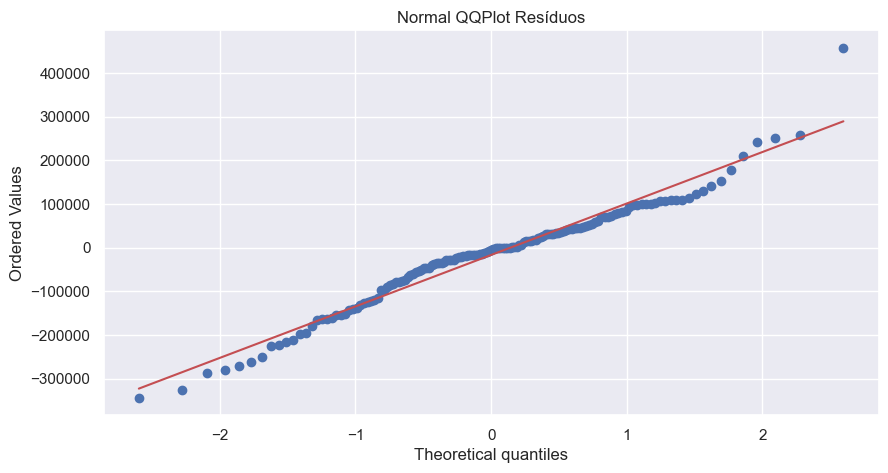

In [17]:
def analisa_normalidade_residual(residuos):
    estatistica, p_value = stats.shapiro(residuos)
    if (p_value > 0.05):
        print(f'Shapiro Estatistica de Teste: {estatistica} --> Resíduos seguem Distribuição Normal')
        print(f'Shapiro p_value: {p_value} --> Resíduos seguem Distribuição Normal')
    else:
        print(f'Shapiro Estatistica de Teste: {estatistica} --> Resíduos não seguem Distribuição Normal')
        print(f'Shapiro p_value: {p_value} --> Resíduos não seguem Distribuição Normal')

    stats.probplot(residuos, dist = 'norm', plot = plt)
    plt.title(f'Normal QQPlot Resíduos')
    plt.show()

analisa_normalidade_residual(regressao_linear_simples(x_train, x_test, y_train, y_test)[6])

* Análise da Homocedasticidade dos Resíduos 

> 1. Deveria formar um retângulo para que haja Homocedasticidade

> 2. Teste de Breusch-Pagan 

H0: Existe Homocedasticidade : p_value > 0.05

h1: Não existe Homocedasticidade : p_value <= 0.05


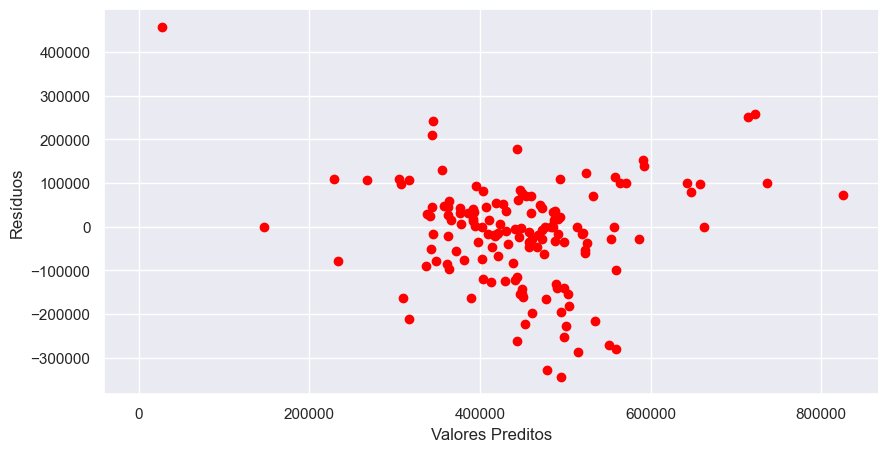

In [18]:
def analisa_homocedasticidade_residual(residuos, previsoes):
    plt.scatter(y = residuos, x = previsoes, color = 'red')
    plt.hlines( y = 0, xmin = 0, xmax = 4, color = 'orange')
    plt.ylabel('Resíduos')
    plt.xlabel('Valores Preditos')
    plt.show()
analisa_homocedasticidade_residual(regressao_linear_simples(x_train, x_test, y_train, y_test)[6], regressao_linear_simples(x_train, x_test, y_train, y_test)[3])

In [19]:
# from statsmodels.compat import lzip
# import statsmodels.stats.api as sms
# estatistica, p_value, f_value, fp_value = sms.het_breuschpagan(regressao.resid, regressao.model.exog)
# print(f'Estatística de Teste: {estatistica}')
# print(f'p_value: {p_value}')
# print(f'Estatística de Teste: {f_value}')
# print(f'Estatística de Teste: {fp_value}')

* Métricas 

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

previsoes_teste = regressao_linear_simples(x_train, x_test, y_train, y_test)[3]

def metricas_regressao_linear_simples(variavel_alvo_real, varuavel_alvo_predita):

    MAE = mean_absolute_error(variavel_alvo_real, varuavel_alvo_predita)
    MSE = mean_squared_error(variavel_alvo_real, varuavel_alvo_predita)
    RMSE = np.sqrt(mean_squared_error(variavel_alvo_real, varuavel_alvo_predita))

    return MAE, MSE, RMSE

metricas_regressao_linear_simples(y_test, previsoes_teste)

(86394.74245632486, 14289038818.453953, 119536.76764265442)

* Validação Cruzada 

In [21]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

def validacao_cruzada(data, num_splits, model, variavel_preditora, variavel_predita):
    kfold = KFold(n_splits = num_splits, shuffle = True, random_state = 42)
    modelo = model 
    resultado = cross_val_score(modelo, data[[variavel_preditora]], data[variavel_predita], cv = kfold)

    return print(f'Coeficiente de Determinação Médio = {round((resultado.mean()*100), 2)}')

validacao_cruzada(df, 15, LinearRegression(), variavel_preditora, variavel_predita)


Coeficiente de Determinação Médio = 44.05


## 3.5) Regressão Linear Múltipla

> CONSULTAR:

https://medium.com/@lauradamaceno/regress%C3%A3o-linear-6a7f247c3e29

https://ivanildo-batista13.medium.com/regress%C3%A3o-linear-m%C3%BAltipla-em-python-eb4b6603a3

https://www.obaricentrodamente.com/2010/07/regressao-linear.html

https://estatsite.com.br/2019/10/17/derivando-os-parametros-de-uma-regressao-linear-simples/

https://www.youtube.com/watch?v=ebUxLW9BEEE&list=PLDoqBsM6cBJbHnTpz9T1itfHaxQdhx7b1&index=8&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

### 1) Motivação

> 1. Utilizada quando usamos Duas ou Mais Variáveis Explanatórias/Independentes para Prever uma Variável Dependente.

> 2. Nem sempre ter mais Variáveis Explanatórias torna nosso Modelo melhor.

> 3. Analisar cada variável independente com y individualmente.

> 4. Gerar gráficos de dispersão individuais.

> 5. Buscar redundâncias (mesmos efeitos de x sobre y)

> 6. Analisar Multicolinearidade: Quando uma variável preditora pode ser predita por outras variáveis preditoras

> 7. Eliminar Parcimônia: Não colocar variáveis que não melhorem o modelo em nada.

> 8. Fórmula Geral

<img src='../Resumo_Estatistica_Matematica/reg_01.jpg' width='600px'>
<img src='../Resumo_Estatistica_Matematica/reg_02.jpg' width='600px'>
<img src = './img382.png' width = '70%'>
<img src = './img383.png' width = '70%'>

### 2) Fundamentos

<img src = './img345.png' width = '70%'>
<img src = './img346.png' width = '70%'>
<img src = './img347.png' width = '70%'>
<img src = './img348.png' width = '70%'>
<img src = './img349.png' width = '70%'>
<img src = './img350.png' width = '70%'>
<img src = './img351.png' width = '70%'>
<img src = './img352.png' width = '70%'>

#### Avaliação da Regressão Linear Múltipla

<img src = './img353.png' width = '70%'>
<img src = './img354.png' width = '70%'>
<img src = './img355.png' width = '70%'>
<img src = './img356.png' width = '70%'>
<img src = './img357.png' width = '70%'>
<img src = './img358.png' width = '70%'>
<img src = './img359.png' width = '70%'>

#### Seleção de Variáveis para Regressão Linear

<img src = './img360.png' width = '70%'>
<img src = './img361.png' width = '70%'>
<img src = './img362.png' width = '70%'>
<img src = './img363.png' width = '70%'>

#### Variáveis Categóricas em Regressão Linear

<img src = './img364.png' width = '70%'>
<img src = './img365.png' width = '70%'>

#### Problemas Comuns

<img src = './img366.png' width = '70%'>
<img src = './img367.png' width = '70%'>
<img src = './img368.png' width = '70%'>
<img src = './img369.png' width = '70%'>
<img src = './img370.png' width = '70%'>
<img src = './img371.png' width = '70%'>
<img src = './img372.png' width = '70%'>
<img src = './img373.png' width = '70%'>
<img src = './img374.png' width = '70%'>
<img src = './img375.png' width = '70%'>
<img src = './img376.png' width = '70%'>
<img src = './img377.png' width = '70%'>
<img src = './img378.png' width = '70%'>
<img src = './img379.png' width = '70%'>
<img src = './img380.png' width = '70%'>
<img src = './img381.png' width = '70%'>

### 3) Correlação NÃO significa Multicolinearidade

> CONSULTAR: 

https://www4.eco.unicamp.br/docentes/gori/images/arquivos/EconometriaI/Econometria_Cap10_Multicolinearidade.pdf

https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb

https://universidadedosdados.medium.com/multicollinearity-is-not-correlation-38014cbfc710

https://www.youtube.com/watch?v=ebUxLW9BEEE&list=PLDoqBsM6cBJbHnTpz9T1itfHaxQdhx7b1&index=9&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

> 1. Multicolinearidade 

* Multicolinearidade é quando um de nososs preditores pode ser prevista através de 1 ou mais variáveis preditoras.

* Para analisarmos a Multicolinearidade, utiliza-se o Variance Inflation Factor (VIF). Matematicamente, essa métrica é igual à razão entre a variância do modelo e a variância de um modelo que inclui apenas aquela única variável independente.

* Analise de Variância 

<img src = './img380.png' width = '70%'>

# $$ VIF_j = \frac {1} {1 - {R_j}^2} $$

> 2. Interpretação dos Resultados

* VIF = 1 --> Sem Multicolinearidade

* 5 => VIF > 1 --> Média Multicolinearidade. Não é um grande problema deixar a variável

* VIF > 5 --> Existe uma Grande Multicolinearidade e deve-se remover a variável do Modelo de Regressão

> 3. Considerações Finais

<img src = './img381.png' width = '70%'>

* Definitivamente não é bom termos Multicolinearidade, entretanto, caso haja, não significa que o modelo não funcione mais.

* A Multicolinearidade aumenta os resíduos, tirando a confiança dos coeficientes de nossa Regressão, entretanto, nossa previsão ainda pode estar intacta, portanto, dependerá de caso a caso. 

* Separação entre Treino e Teste 

In [22]:
from sklearn.model_selection import train_test_split

variaveis_preditoras = list(df.columns[:3])
variavel_predita = df.columns[3]

def separacao_treino_teste(data, variavel_preditora, variavel_predita):

    x_train, x_test, y_train, y_test = train_test_split(data[variavel_preditora].values, data[variavel_predita].values, test_size = 0.3, random_state = 42)
    separacao_realizada = [x_train, y_train, x_test, y_test]

    return x_train, x_test, y_train, y_test
    
separacao_treino_teste(df, variaveis_preditoras, variavel_predita)

x_train = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[0]
x_test = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[1]
y_train = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[2]
y_test = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[3]


* Criação da Regressão Linear 

In [23]:
from sklearn.linear_model import LinearRegression

def regressao_linear_multipla(x_train, x_test, y_train, y_test):
    reg_linear = LinearRegression()
    reg_linear.fit(x_train, y_train)
 
    coef_linear = reg_linear.intercept_
    coef_angular = reg_linear.coef_

    previsoes_treino = reg_linear.predict(x_train)
    previsoes_teste = reg_linear.predict(x_test)

    coef_det_treino = reg_linear.score(x_train, y_train)
    coef_det_teste = reg_linear.score(x_test, y_test)



    return coef_linear, coef_angular, previsoes_treino, previsoes_teste, coef_det_treino, coef_det_teste

print(f'Coeficiente Linear: {regressao_linear_multipla(x_train, x_test, y_train, y_test)[0]}')
print(f'Coeficiente Angular: {regressao_linear_multipla(x_train, x_test, y_train, y_test)[1]}')
print(f'Coeficiente de Determinação de Treino: {regressao_linear_multipla(x_train, x_test, y_train, y_test)[4]}')
print(f'Coeficiente de Determinação Teste: {regressao_linear_multipla(x_train, x_test, y_train, y_test)[5]}')

Coeficiente Linear: 374190.79088170885
Coeficiente Angular: [ 91586.44065901 -10200.41834802 -19182.77059341]
Coeficiente de Determinação de Treino: 0.7220172075811037
Coeficiente de Determinação Teste: 0.6910052678184777


* Métricas 

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

previsoes_teste = regressao_linear_multipla(x_train, x_test, y_train, y_test)[3]

def metricas_regressao_linear_multipla(variavel_alvo_real, varuavel_alvo_predita):

    MAE = mean_absolute_error(variavel_alvo_real, varuavel_alvo_predita)
    MSE = mean_squared_error(variavel_alvo_real, varuavel_alvo_predita)
    RMSE = np.sqrt(mean_squared_error(variavel_alvo_real, varuavel_alvo_predita))

    return MAE, MSE, RMSE

metricas_regressao_linear_multipla(y_test, previsoes_teste)

(63313.49737234132, 7048219280.217674, 83953.67341705588)

* Validação Cruzada 

In [25]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

def validacao_cruzada(data, num_splits, model, variavel_preditora, variavel_predita):
    kfold = KFold(n_splits = num_splits, shuffle = True, random_state = 42)
    modelo = model 
    resultado = cross_val_score(modelo, data[variavel_preditora], data[variavel_predita], cv = kfold)

    return print(f'Coeficiente de Determinação Médio = {round((resultado.mean()*100), 2)}')

validacao_cruzada(df, 15, LinearRegression(), variaveis_preditoras, variavel_predita)



Coeficiente de Determinação Médio = 68.97


## 3.6) Coeficientes de Determinação 

### 3.6.1) Coeficiente de Determinação

<img src = './img337.png' width = '70%'>

> 1. O coeficiente de determinação (R²) é um valor entre 0 e 1 que expressa a quantidade da variância dos dados que é explicada pelo modelo linear.

> 2. Quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. Por exemplo, um R² = 0,8234 significa que o modelo linear explica 82,34% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas naquele modelo linear.

# $R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$

onde:

* $R^2$  é o Coeficiente de Determinação  

* $\hat{y}_i$ é o valor estimado

* $\bar{y}_i $ é a média das observações 


### 3.6.2) Coeficiente de Determinação Ajustado - R²

<img src = './img363.png' width = '70%'>

> 1. A inclusão de inúmeras variáveis, mesmo que tenham muito pouco poder explicativo sobre a variável dependente, aumentarão o valor de R². Isto incentiva a inclusão indiscriminada de variáveis, prejudicando o princípio da parcimônia.

> 2. Para combater esta tendência, podemos usar uma medida alternativa do coeficiente de determinação, que penaliza a inclusão de regressores pouco explicativos.

# $\bar{R^2} = 1 - \frac {n-1} {n-(k+1)} (1-R^2) $

onde:

* $(k+1)$ representa o número de variáveis explicativas mais a constante




## 3.7) Condições Para Regressão Linear - Ponto de Vista Inferencial 

> CONSULTAR:

https://www.kaggle.com/code/simranjain17/linear-regression-assumptions-code

https://towardsdatascience.com/ols-linear-regression-gauss-markov-blue-and-understanding-the-math-453d7cc630a5

https://estatsite.com.br/2017/11/21/linearidade-nos-parametros-pronto-para-postar/

https://www4.eco.unicamp.br/docentes/gori/images/arquivos/EconometriaI/Econometria_Cap10_Multicolinearidade.pdf

### Motivação

> 1. Nesta situação, deseja-se obter um ponto de vista inferencial, portanto, existem algumas premissas numa regressão linear que são utilizadas para garantir que aqueles coeficientes da equação são os coeficientes que chamamos de BLUE, Best Linear Unbiased Estimatores (Melhores Estimadores Lineares Não-Viesados). Ou seja, elas só dizem respeito a encontrar esses parâmetros.

### Linearidade dos Parâmetros

> 1. Uma das premissas do método de mínimos quadrados para regressão linear é a linearidade dos parâmetros

> 2. Modelos Lineares nos Parâmetros --> $y = {\alpha + \beta_1 x_1 + \beta_2 x_2  + e}$

> 3. Modelos Não Lineares nos Parâmetros --> $y = {{\alpha}^2 + 2\alpha x + x^2 + e} $, ou  $ y = \alpha \beta x + e$
### Normalidade dos Resíduos

> 1. Residuais próximos de uma Distribuição Normal. Podemos conferir utilizando Histogramas, Diagramas de Normalidade, Testes de Shapiro-Wilk, Kolmogorov e Anderson. Se os resíduos não tiverem Normalidade, a Regressão Linear não é válida.


### Homocedasticidade dos Resíduos 

> 1. Homocedasticidade é o termo para designar variância constante dos Resíduos para observações distintas (Xij). Caso a suposição de homocedasticidade não seja válida, podemos dizer que:

* Os erros padrões dos estimadores, obtidos pelo Método dos Mínimos Quadrados, são incorretos e portanto a inferência estatística não é válida.

* Não podemos mais dizer que os Estimadores de Mínimos Quadrados são os melhores estimadores de mínima variância para β.
Quando não há variação constante, temos o problema de heterocedasticidade, ou seja, a variância dos erros será diferente para cada valor condicional de X.


### Multicolinearidade

> 1. Colinearidade é quando uma ou mais variáveis são capazes de predizer outra, elas são colineares. Nesta situação, seria impossível estimar os efeitos isolados de X1 e X2 sobre Y.

> 2. Ela é ruim para um modelo inferencial pois observamos relação entre as variáveis independentes X1 e X2, portanto, o efeito sobre Y será dividido em 3 partes: i) efeito isolado de X1; ii) isolado de X2; e iii) efeito conjunto de X1 e X2.

> 3. O problema é que quando há uma forte relação linear entre X1 e X2 (multicolinearidade) pode ficar muito difícil identificar os efeitos isolados de X1 e X2 sobre Y. Ou seja, a maior parcela da variabilidade de Y é explicada pelo efeito conjunto de X1 e X2.


## 3.8) Condições para Regressão Linear - Ponto de Vista Preditivo 

### Motivação

> 1. Nesta situação, deseja-se obter um ponto de vista preditivo, portanto, as premissas citadas anteriormente não precisam ser necessariamente atendidas. Tudo que deve acontecer é criarmos um modelo que, com base no input das variáveis preditoras, consiga prever o valor da variável predita corretamente, de forma a minimizar o erro. 



## 3.9) Métricas

> 1. Y e Ŷ (Y real e Y previsto, respectivamente).

#### <font color=green> Erro Médio Absoluto - (MAE)</font>
***
> 1. O erro médio absoluto, MAE (da sigla em inglês Mean Absolute Error), é calculado a partir da média dos erros absolutos.

> 2. Utilizamos o módulo de cada erro para evitar a subestimação, pois, o valor é menos afetado por outliers.

> 3. Quanto menor, melhor.

> 4. Cada erro, pode ser interpretado como a diferença entre Y e Ŷ e assim, temos:

# $$MAE = \frac {\sum{|Y_i - \hat{Y_i}|} } {n} $$

> 5. Utilizamos essa medida em séries temporais, pois há casos em que o erro negativo pode zerar o positivo ou dar uma ideia de que o modelo é preciso. Mas aqui, medimos apenas a distância do valor real, independente de ser acima ou abaixo.

#### <font color=green> Erro Quadrático Médio - (MSE)</font>
***
> 1. O erro quadrático médio, MSE (da sigla em inglês Mean Squared Error), é comumente usado para verificar a acurácia de modelos e dá um maior peso aos maiores erros, já que, ao ser calculado, cada erro é elevado ao quadrado individualmente e, após isso, a média desses erros quadráticos é calculada.

> 2. Por conta do expoente ao quadrado que o erro assume, essa métrica é bastante sensível a outliers (valores discrepantes) e, caso tenha muitos erros significativos em sua análise, essa métrica poderá ser extrapolada.


> 3. Quanto menor, melhor.

> 4. Cada erro, pode ser interpretado como a diferença entre Y e Ŷ e assim, temos:

# $$MSE = \frac {\sum{(Y_i - \hat{Y_i})^2} } {n} $$


#### <font color=green> Raiz do Erro Quadrático Médio - (RMSE) </font>
> 1. A raiz quadrada do erro médio, RMSE (da sigla em inglês Root Mean Squared Error) é apenas a raiz quadrada do MSE, onde o erro retorna à unidade de medida do modelo (no MSE, a unidade de medida é quadrática).

> 2. Quanto menor, melhor.

> 3. A equação para cálculo, dá-se por:

# $$RMSE = \sqrt{\frac {\sum{(Y_i - \hat{Y_i})^2} } {n}} $$

> 4. É frequentemente usada em séries temporais por ser mais sensível a erros maiores devido ao processo de quadratura que a produziu.

#### <font color=green> Média Percentual Absoluta do Erro - (MAPE) </font>
> 1. Esta é outra métrica interessante para usar, geralmente usada em relatórios de gerenciamento, porque o erro é medido como uma porcentagem e assim, é possível fazer comparações entre erros percentuais do modelo entre produtos.

> 2. Quanto menor, melhor.

> 3. A fórmula para cálculo é a seguinte:

# $$MAPE = {\frac {1} {n}} ({\sum {\frac {|Y_i - \hat{Y_i}|}{Y_i}}) {.100}} $$



## 3.10) Regressão por SVM (Boa para Dados Não Lineares e com muitos Outliers)

> CONSULTAR:

https://www.youtube.com/watch?v=bZ8ZUcV2b20&ab_channel=RafaDontal

https://www.youtube.com/watch?v=FBw11uU0yXE&ab_channel=RafaDontal

https://medium.com/turing-talks/turing-talks-12-classifica%C3%A7%C3%A3o-por-svm-f4598094a3f1

* Separação entre Treino e Teste 

In [26]:
from sklearn.model_selection import train_test_split

variaveis_preditoras = list(df.columns[:3])
variavel_predita = df.columns[3]

def separacao_treino_teste(data, variavel_preditora, variavel_predita):

    x_train, x_test, y_train, y_test = train_test_split(data[variavel_preditora].values, data[variavel_predita].values, test_size = 0.3, random_state = 42)
    separacao_realizada = [x_train, y_train, x_test, y_test]

    return x_train, x_test, y_train, y_test
    
separacao_treino_teste(df, variaveis_preditoras, variavel_predita)

x_train = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[0]
x_test = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[1]
y_train = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[2]
y_test = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[3]


* Criando uma Regressão com SVM 

https://stackoverflow.com/questions/64702590/difference-between-fit-transform-and-fit-transform

https://datascience.stackexchange.com/questions/12321/whats-the-difference-between-fit-and-fit-transform-in-scikit-learn-models

In [27]:
from sklearn.svm import SVR 
from sklearn.preprocessing import StandardScaler

def regressao_com_svm(x_train, x_test, y_train, y_test):

    x_scaler = StandardScaler()
    y_scaler = StandardScaler()
    x_train_scaler = x_scaler.fit_transform(x_train)
    y_train_scaler = y_scaler.fit_transform(y_train.reshape(-1,1)) # Reshape muda a matriz de 1D para 2D
    x_test_scaler = x_scaler.transform(x_test)
    y_test_scaler = y_scaler.transform(y_test.reshape(-1,1))

    regressao_svm = SVR(kernel = 'rbf')
    regressao_svm.fit(x_train_scaler, y_train_scaler.ravel()) # Ravel muda a matriz de 2D para 1D

    previsoes_treino = regressao_svm.predict(x_train_scaler)
    previsoes_teste = regressao_svm.predict(x_test)

    coef_det_treino = regressao_svm.score(x_train_scaler, y_train_scaler)
    coef_det_teste = regressao_svm.score(x_test_scaler, y_test_scaler)

    y_test_inverse = y_scaler.inverse_transform(y_test_scaler) # Faz a inversão da Padronização
    previsoes_inverse = y_scaler.inverse_transform(previsoes_teste.reshape(-1,1)) # Faz a inversão da Padronização e transforma em matriz 2D

    return previsoes_treino, previsoes_teste, coef_det_treino, coef_det_teste, y_test_inverse, previsoes_inverse

print(f'Coeficiente de Determinação de Treino: {regressao_com_svm(x_train, x_test, y_train, y_test)[2]}')
print(f'Coeficiente de Determinação Teste: {regressao_com_svm(x_train, x_test, y_train, y_test)[3]}')

Coeficiente de Determinação de Treino: 0.8614964656921278
Coeficiente de Determinação Teste: 0.83656239018093


* Métricas 

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_teste = regressao_com_svm(x_train, x_test, y_train, y_test)[4]
previsoes_teste = regressao_com_svm(x_train, x_test, y_train, y_test)[5]

def metricas_regressao_com_svm(variavel_alvo_real, varuavel_alvo_predita):

    MAE = mean_absolute_error(variavel_alvo_real, varuavel_alvo_predita)
    MSE = mean_squared_error(variavel_alvo_real, varuavel_alvo_predita)
    RMSE = np.sqrt(mean_squared_error(variavel_alvo_real, varuavel_alvo_predita))

    return MAE, MSE, RMSE

metricas_regressao_com_svm(y_teste, previsoes_teste)

(116177.97053005737, 23939384993.20962, 154723.57607426745)

* Validação Cruzada 

In [29]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

variaveis_preditoras = df.iloc[:, 0:3]
variavel_predita = df.iloc[:, 3]

def validacao_cruzada(data, num_splits, model, variavel_preditora, variavel_predita):
    kfold = KFold(n_splits = num_splits, shuffle = True, random_state = 42)

    x_scaler = StandardScaler()
    y_scaler = StandardScaler()
    x_cross_val_scaler = x_scaler.fit_transform(variavel_preditora.values)
    y_cross_val_scaler = y_scaler.fit_transform(variavel_predita.values.reshape(-1,1)) # Reshape muda a matriz de 1D para 2D
    # x_test_scaler = x_scaler.transform(x_test)
    # y_test_scaler = y_scaler.transform(y_test.reshape(-1,1))

    modelo = model 
    resultado = cross_val_score(modelo, x_cross_val_scaler, y_cross_val_scaler.ravel(), cv = kfold)

    return print(f'Coeficiente de Determinação Médio = {round((resultado.mean()*100), 2)}')

validacao_cruzada(df, 15, SVR(kernel = 'rbf'), variaveis_preditoras, variavel_predita)

Coeficiente de Determinação Médio = 81.93


## 3.11) Regressão por Árvores de Decisão (Boa para Dados Não Lineares)

> CONSULTAR:

https://medium.com/data-hackers/introdu%C3%A7%C3%A3o-%C3%A0-%C3%A1rvore-de-regress%C3%A3o-3845c8eba857

https://didatica.tech/como-funciona-o-algoritmo-arvore-de-decisao/

https://www.youtube.com/watch?v=JwJcb-raZzo&ab_channel=UniversoDiscreto

https://www.youtube.com/watch?v=h2N3Fc47ktc&ab_channel=RafaDontal

https://www.youtube.com/watch?v=N_XDMLPphFw&ab_channel=CanaldaEngenhariadeManufaturaeQualidade


* Separação entre Treino e Teste 

In [30]:
from sklearn.model_selection import train_test_split

variaveis_preditoras = list(df.columns[:3])
variavel_predita = df.columns[3]

def separacao_treino_teste(data, variavel_preditora, variavel_predita):

    x_train, x_test, y_train, y_test = train_test_split(data[variavel_preditora].values, data[variavel_predita].values, test_size = 0.3, random_state = 42)
    separacao_realizada = [x_train, y_train, x_test, y_test]

    return x_train, x_test, y_train, y_test
    
separacao_treino_teste(df, variaveis_preditoras, variavel_predita)

x_train = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[0]
x_test = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[1]
y_train = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[2]
y_test = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[3]


* Regressão com Árvore de Decisão 

In [31]:
from sklearn.tree import DecisionTreeRegressor

def regressao_com_arvore_de_decisao(x_train, x_test, y_train, y_test):
    reg_arvore_de_decisao = DecisionTreeRegressor(max_depth = 5, random_state = 42)
    reg_arvore_de_decisao.fit(x_train, y_train)

    previsoes_treino = reg_arvore_de_decisao.predict(x_train)
    previsoes_teste = reg_arvore_de_decisao.predict(x_test)

    coef_det_treino = reg_arvore_de_decisao.score(x_train, y_train)
    coef_det_teste = reg_arvore_de_decisao.score(x_test, y_test)



    return previsoes_treino, previsoes_teste, coef_det_treino, coef_det_teste

print(f'Coeficiente de Determinação de Treino: {regressao_com_arvore_de_decisao(x_train, x_test, y_train, y_test)[2]}')
print(f'Coeficiente de Determinação Teste: {regressao_com_arvore_de_decisao(x_train, x_test, y_train, y_test)[3]}')

Coeficiente de Determinação de Treino: 0.8968196256004289
Coeficiente de Determinação Teste: 0.8152593216753685


* Métricas 

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

previsoes_teste = regressao_com_arvore_de_decisao(x_train, x_test, y_train, y_test)[1]

def metricas_regressao_com_arvore_de_decisao(variavel_alvo_real, varuavel_alvo_predita):

    MAE = mean_absolute_error(variavel_alvo_real, varuavel_alvo_predita)
    MSE = mean_squared_error(variavel_alvo_real, varuavel_alvo_predita)
    RMSE = np.sqrt(mean_squared_error(variavel_alvo_real, varuavel_alvo_predita))

    return MAE, MSE, RMSE

metricas_regressao_com_arvore_de_decisao(y_test, previsoes_teste)

(50456.24504712551, 4213964431.093376, 64915.055504046024)

* Validação Cruzada 

In [33]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

def validacao_cruzada(data, num_splits, model, variavel_preditora, variavel_predita):
    kfold = KFold(n_splits = num_splits, shuffle = True, random_state = 42)
    modelo = model 
    resultado = cross_val_score(modelo, data[variavel_preditora], data[variavel_predita], cv = kfold)

    return print(f'Coeficiente de Determinação Médio = {round((resultado.mean()*100), 2)}')

validacao_cruzada(df, 15, DecisionTreeRegressor(max_depth = 5, random_state = 42), variaveis_preditoras, variavel_predita)

Coeficiente de Determinação Médio = 73.99


## 3.12) Regressão por Random Forest (Boa para Dados Não Lineares)

> CONSULTAR:

https://medium.com/turing-talks/turing-talks-18-modelos-de-predi%C3%A7%C3%A3o-random-forest-cfc91cd8e524

https://k3ybladewielder.medium.com/m%C3%A9todos-de-aprendizagem-supervisionada-baseados-em-%C3%A1rvore-2c0580fe8f10

https://www.youtube.com/watch?v=Y5HPU-NuXxQ&t=1s&ab_channel=RafaDontal

https://www.youtube.com/watch?v=N_XDMLPphFw&ab_channel=CanaldaEngenhariadeManufaturaeQualidade



* Separação entre Treino e Teste 

In [34]:
from sklearn.model_selection import train_test_split

variaveis_preditoras = list(df.columns[:3])
variavel_predita = df.columns[3]

def separacao_treino_teste(data, variavel_preditora, variavel_predita):

    x_train, x_test, y_train, y_test = train_test_split(data[variavel_preditora].values, data[variavel_predita].values, test_size = 0.3, random_state = 42)
    separacao_realizada = [x_train, y_train, x_test, y_test]

    return x_train, x_test, y_train, y_test
    
separacao_treino_teste(df, variaveis_preditoras, variavel_predita)

x_train = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[0]
x_test = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[1]
y_train = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[2]
y_test = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[3]


* Regressão com Random Forest 

In [35]:
from sklearn.ensemble import RandomForestRegressor

def regressao_com_random_forest(x_train, x_test, y_train, y_test):
    reg_random_forest = RandomForestRegressor(n_estimators = 100, max_depth = 5, criterion = 'squared_error',random_state = 42)
    reg_random_forest.fit(x_train, y_train)

    previsoes_treino = reg_random_forest.predict(x_train)
    previsoes_teste = reg_random_forest.predict(x_test)

    coef_det_treino = reg_random_forest.score(x_train, y_train)
    coef_det_teste = reg_random_forest.score(x_test, y_test)



    return previsoes_treino, previsoes_teste, coef_det_treino, coef_det_teste

print(f'Coeficiente de Determinação de Treino: {regressao_com_random_forest(x_train, x_test, y_train, y_test)[2]}')
print(f'Coeficiente de Determinação Teste: {regressao_com_random_forest(x_train, x_test, y_train, y_test)[3]}')

Coeficiente de Determinação de Treino: 0.9122725143388755
Coeficiente de Determinação Teste: 0.8566865014210394


* Métricas 

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

previsoes_teste = regressao_com_random_forest(x_train, x_test, y_train, y_test)[1]

def metricas_regressao_com_random_forest(variavel_alvo_real, varuavel_alvo_predita):

    MAE = mean_absolute_error(variavel_alvo_real, varuavel_alvo_predita)
    MSE = mean_squared_error(variavel_alvo_real, varuavel_alvo_predita)
    RMSE = np.sqrt(mean_squared_error(variavel_alvo_real, varuavel_alvo_predita))

    return MAE, MSE, RMSE

metricas_regressao_com_random_forest(y_test, previsoes_teste)

(44846.377512697254, 3269003832.7458634, 57175.20295325469)

* Validação Cruzada 

In [37]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

def validacao_cruzada(data, num_splits, model, variavel_preditora, variavel_predita):
    kfold = KFold(n_splits = num_splits, shuffle = True, random_state = 42)
    modelo = model 
    resultado = cross_val_score(modelo, data[variavel_preditora], data[variavel_predita], cv = kfold)

    return print(f'Coeficiente de Determinação Médio = {round((resultado.mean()*100), 2)}')

validacao_cruzada(df, 15, RandomForestRegressor(n_estimators = 100, max_depth = 5, criterion = 'squared_error',random_state = 42), variaveis_preditoras, variavel_predita)

Coeficiente de Determinação Médio = 81.89


## 3.13) Regressão por XGBOOST (Boa para Dados Não Lineares)

> CONSULTAR:

https://acervolima.com/xgboost-para-regressao/

https://www.youtube.com/watch?v=OtD8wVaFm6E&list=PLblh5JKOoLULU0irPgs1SnKO6wqVjKUsQ&ab_channel=StatQuestwithJoshStarmer



* Separação entre Treino e Teste 

In [38]:
from sklearn.model_selection import train_test_split

variaveis_preditoras = list(df.columns[:3])
variavel_predita = df.columns[3]

def separacao_treino_teste(data, variavel_preditora, variavel_predita):

    x_train, x_test, y_train, y_test = train_test_split(data[variavel_preditora].values, data[variavel_predita].values, test_size = 0.3, random_state = 42)
    separacao_realizada = [x_train, y_train, x_test, y_test]

    return x_train, x_test, y_train, y_test
    
separacao_treino_teste(df, variaveis_preditoras, variavel_predita)

x_train = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[0]
x_test = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[1]
y_train = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[2]
y_test = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[3]


* Regressão com XGBOOST

In [39]:
from xgboost import XGBRegressor

def regressao_com_xgboost(x_train, x_test, y_train, y_test):
    reg_xgboost = XGBRegressor(n_estimators = 100, max_depth = 3, learning_rate = 0.05, objective = 'reg:squarederror', random_state = 42)
    reg_xgboost.fit(x_train, y_train)

    previsoes_treino = reg_xgboost.predict(x_train)
    previsoes_teste = reg_xgboost.predict(x_test)

    coef_det_treino = reg_xgboost.score(x_train, y_train)
    coef_det_teste = reg_xgboost.score(x_test, y_test)



    return previsoes_treino, previsoes_teste, coef_det_treino, coef_det_teste

print(f'Coeficiente de Determinação de Treino: {regressao_com_xgboost(x_train, x_test, y_train, y_test)[2]}')
print(f'Coeficiente de Determinação Teste: {regressao_com_xgboost(x_train, x_test, y_train, y_test)[3]}')

Coeficiente de Determinação de Treino: 0.903895782759591
Coeficiente de Determinação Teste: 0.85775152781874


* Métricas 

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

previsoes_teste = regressao_com_xgboost(x_train, x_test, y_train, y_test)[1]

def metricas_regressao_com_xgboost(variavel_alvo_real, varuavel_alvo_predita):

    MAE = mean_absolute_error(variavel_alvo_real, varuavel_alvo_predita)
    MSE = mean_squared_error(variavel_alvo_real, varuavel_alvo_predita)
    RMSE = np.sqrt(mean_squared_error(variavel_alvo_real, varuavel_alvo_predita))

    return MAE, MSE, RMSE

metricas_regressao_com_xgboost(y_test, previsoes_teste)

(45005.80782312925, 3244710410.2100906, 56962.359591313376)

* Validação Cruzada 

In [41]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

def validacao_cruzada(data, num_splits, model, variavel_preditora, variavel_predita):
    kfold = KFold(n_splits = num_splits, shuffle = True, random_state = 42)
    modelo = model 
    resultado = cross_val_score(modelo, data[variavel_preditora], data[variavel_predita], cv = kfold)

    return print(f'Coeficiente de Determinação Médio = {round((resultado.mean()*100), 2)}')

validacao_cruzada(df, 15, XGBRegressor(n_estimators = 100, max_depth = 3, learning_rate = 0.05, objective = 'reg:squarederror', random_state = 42), variaveis_preditoras, variavel_predita)

Coeficiente de Determinação Médio = 82.25


## 3.14) Regressão por CatBoost (Boa para Dados Não Lineares)

> CONSULTAR: 

https://medium.com/data-hackers/entendendo-catboost-um-guia-quase-definitivo-b28bc153a78

https://www.youtube.com/watch?v=D69QgC6_9G0&ab_channel=Eduardo%7CCi%C3%AAnciadosDados

* Separação entre Treino e Teste 

In [42]:
from sklearn.model_selection import train_test_split

variaveis_preditoras = list(df.columns[:3])
variavel_predita = df.columns[3]

def separacao_treino_teste(data, variavel_preditora, variavel_predita):

    x_train, x_test, y_train, y_test = train_test_split(data[variavel_preditora].values, data[variavel_predita].values, test_size = 0.3, random_state = 42)
    separacao_realizada = [x_train, y_train, x_test, y_test]

    return x_train, x_test, y_train, y_test
    
separacao_treino_teste(df, variaveis_preditoras, variavel_predita)

x_train = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[0]
x_test = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[1]
y_train = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[2]
y_test = separacao_treino_teste(df, variaveis_preditoras, variavel_predita)[3]


* Regressão com CATBOOST 

In [43]:
from catboost import CatBoostRegressor

def regressao_com_catboost(x_train, x_test, y_train, y_test):
    reg_catboost = CatBoostRegressor(iterations = 100, learning_rate = 0.05, depth = 5, random_state = 42)
    reg_catboost.fit(x_train, y_train)

    previsoes_treino = reg_catboost.predict(x_train)
    previsoes_teste = reg_catboost.predict(x_test)

    coef_det_treino = reg_catboost.score(x_train, y_train)
    coef_det_teste = reg_catboost.score(x_test, y_test)



    return previsoes_treino, previsoes_teste, coef_det_treino, coef_det_teste

print(f'Coeficiente de Determinação de Treino: {regressao_com_catboost(x_train, x_test, y_train, y_test)[2]}')
print(f'Coeficiente de Determinação Teste: {regressao_com_catboost(x_train, x_test, y_train, y_test)[3]}')

0:	learn: 164698.6460899	total: 152ms	remaining: 15s
1:	learn: 159809.4833907	total: 153ms	remaining: 7.49s
2:	learn: 154548.6606909	total: 153ms	remaining: 4.96s
3:	learn: 149378.0312693	total: 154ms	remaining: 3.69s
4:	learn: 145329.8142807	total: 155ms	remaining: 2.94s
5:	learn: 141025.2403459	total: 155ms	remaining: 2.43s
6:	learn: 136838.3733673	total: 156ms	remaining: 2.07s
7:	learn: 132735.3398654	total: 156ms	remaining: 1.8s
8:	learn: 129055.0827041	total: 157ms	remaining: 1.59s
9:	learn: 125215.5715025	total: 157ms	remaining: 1.42s
10:	learn: 121749.8888479	total: 158ms	remaining: 1.28s
11:	learn: 118255.9321676	total: 159ms	remaining: 1.16s
12:	learn: 115002.5859714	total: 159ms	remaining: 1.06s
13:	learn: 111941.8134446	total: 160ms	remaining: 981ms
14:	learn: 109152.5326318	total: 160ms	remaining: 909ms
15:	learn: 106260.6949132	total: 161ms	remaining: 846ms
16:	learn: 103991.1865435	total: 162ms	remaining: 790ms
17:	learn: 101527.8461713	total: 162ms	remaining: 740ms
18:	l

* Métricas 

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

previsoes_teste = regressao_com_catboost(x_train, x_test, y_train, y_test)[1]

def metricas_regressao_com_catboost(variavel_alvo_real, varuavel_alvo_predita):

    MAE = mean_absolute_error(variavel_alvo_real, varuavel_alvo_predita)
    MSE = mean_squared_error(variavel_alvo_real, varuavel_alvo_predita)
    RMSE = np.sqrt(mean_squared_error(variavel_alvo_real, varuavel_alvo_predita))

    return MAE, MSE, RMSE

metricas_regressao_com_catboost(y_test, previsoes_teste)

0:	learn: 164698.6460899	total: 795us	remaining: 78.8ms
1:	learn: 159809.4833907	total: 1.55ms	remaining: 75.9ms
2:	learn: 154548.6606909	total: 2.12ms	remaining: 68.7ms
3:	learn: 149378.0312693	total: 2.83ms	remaining: 67.9ms
4:	learn: 145329.8142807	total: 3.52ms	remaining: 66.9ms
5:	learn: 141025.2403459	total: 4.27ms	remaining: 66.9ms
6:	learn: 136838.3733673	total: 4.9ms	remaining: 65ms
7:	learn: 132735.3398654	total: 5.48ms	remaining: 63ms
8:	learn: 129055.0827041	total: 6.1ms	remaining: 61.7ms
9:	learn: 125215.5715025	total: 6.72ms	remaining: 60.5ms
10:	learn: 121749.8888479	total: 7.29ms	remaining: 59ms
11:	learn: 118255.9321676	total: 7.9ms	remaining: 57.9ms
12:	learn: 115002.5859714	total: 8.49ms	remaining: 56.8ms
13:	learn: 111941.8134446	total: 9.08ms	remaining: 55.8ms
14:	learn: 109152.5326318	total: 9.69ms	remaining: 54.9ms
15:	learn: 106260.6949132	total: 10.3ms	remaining: 53.9ms
16:	learn: 103991.1865435	total: 10.9ms	remaining: 53.2ms
17:	learn: 101527.8461713	total: 1

(46269.752000274646, 3462983760.936787, 58847.121942681166)

* Validação Cruzada 

In [45]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

def validacao_cruzada(data, num_splits, model, variavel_preditora, variavel_predita):
    kfold = KFold(n_splits = num_splits, shuffle = True, random_state = 42)
    modelo = model 
    resultado = cross_val_score(modelo, data[variavel_preditora], data[variavel_predita], cv = kfold)

    return print(f'Coeficiente de Determinação Médio = {round((resultado.mean()*100), 2)}')

validacao_cruzada(df, 15, CatBoostRegressor(iterations = 100, learning_rate = 0.05, depth = 5, random_state = 42), variaveis_preditoras, variavel_predita)

0:	learn: 158299.8802821	total: 789us	remaining: 78.1ms
1:	learn: 153432.3027688	total: 1.54ms	remaining: 75.4ms
2:	learn: 148356.7626540	total: 2.14ms	remaining: 69.1ms
3:	learn: 143541.9509677	total: 2.75ms	remaining: 66ms
4:	learn: 138776.6692874	total: 3.36ms	remaining: 63.9ms
5:	learn: 134540.1272062	total: 3.98ms	remaining: 62.3ms
6:	learn: 130465.6232640	total: 4.61ms	remaining: 61.3ms
7:	learn: 126653.0082068	total: 5.25ms	remaining: 60.3ms
8:	learn: 122957.3496997	total: 5.88ms	remaining: 59.5ms
9:	learn: 119270.2223918	total: 6.48ms	remaining: 58.3ms
10:	learn: 116247.7996621	total: 7.06ms	remaining: 57.2ms
11:	learn: 113201.7415853	total: 7.65ms	remaining: 56.1ms
12:	learn: 110306.7392654	total: 8.2ms	remaining: 54.9ms
13:	learn: 107448.2950603	total: 8.8ms	remaining: 54ms
14:	learn: 104769.2793110	total: 9.38ms	remaining: 53.2ms
15:	learn: 101918.1476579	total: 9.96ms	remaining: 52.3ms
16:	learn: 99633.0080827	total: 10.6ms	remaining: 51.7ms
17:	learn: 97419.0271177	total: 

# <font color='red' style='font-size: 40px;'>4.0 Regressão Polinomial </font>
<hr style='border: 2px solid red;'>





## 4.1) Regressão Polinomial

> 1. Ajusta uma equação não linear por meio de funções polinomiais de variável independente. 

<img src = '../Resumo_Estatistica_Matematica//img52.png' width='70%'>

> 2. Pontos de Máximo e Mínimo da função: 
    
    * Se a concavidade da curva fosse para baixo, a Derivada nos daria o ponto de Máximo.

    * Se a equação é terceiro ou maior grau, poderíamos ter Pontos de Máximo e Mínimo

<img src = '../Resumo_Estatistica_Matematica//img55.png' width='70%'>

## 4.2) Regressão Polinomial Exemplo

* Análise Inicial

In [46]:
vendas = pd.read_excel('../Resumo_Estatistica_Matematica/comissao.xlsx')
print(vendas.shape)
print(vendas.dtypes)
vendas.head()

(50, 2)
quantidade    int64
comissao      int64
dtype: object


,quantidade,comissao
0,1,728
1,2,762
2,3,802
3,4,848
4,5,900


* Trocando tipagem dos dados 

In [47]:
vendas['comissao'] = vendas['comissao'].apply(lambda x: float(x))
print(vendas.dtypes)

quantidade      int64
comissao      float64
dtype: object


* Análise de Valores Missing 

In [48]:
vendas.isnull().sum()

quantidade    0
comissao      0
dtype: int64

* Análise de Correlação

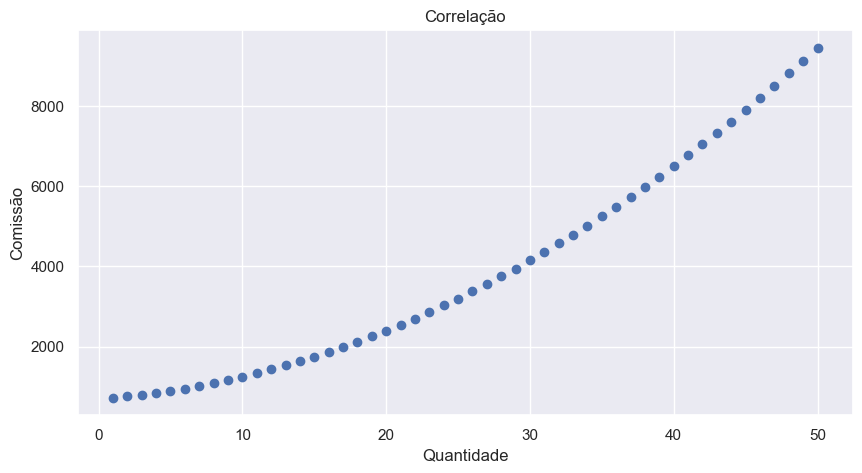

In [49]:
plt.scatter(x = vendas.quantidade, y = vendas.comissao)
plt.title('Correlação')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.grid(True)
plt.show()

* Análise de Normalidade 

Estatística Teste: 0.9124540090560913
p_value 0.0012719858204945922



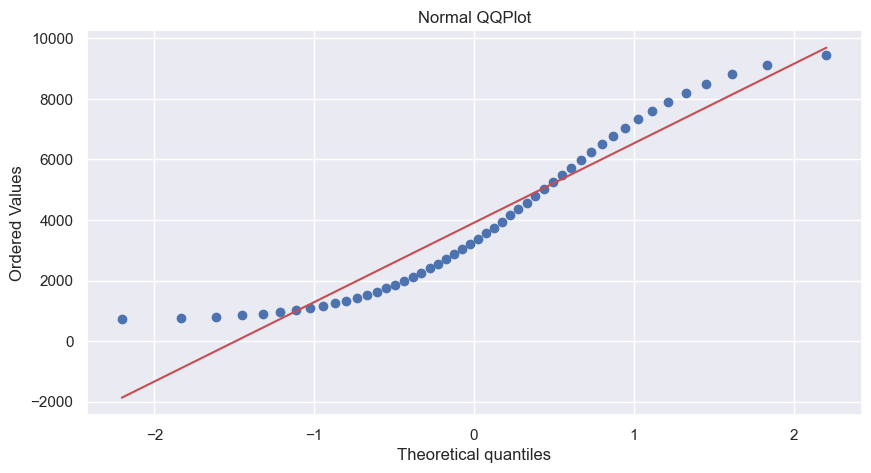

In [50]:
estatistica, p_value = stats.shapiro(vendas.comissao)
print(f'Estatística Teste: {estatistica}')
print(f'p_value {p_value}')
print()
stats.probplot(vendas['comissao'], dist = 'norm', plot = plt)
plt.title('Normal QQPlot')
plt.show()

> 1. Como uma das variáveis já não é normal e temos mais de 30 amostras, teremos de utilizar a Correlação de Spearman.

* Correlação de Spearman 

> 1. H0: Não existe correlação linear: p_value > 0.05

> 2. H1: Existe correlação linear: p_value <= 0.05

Coeficiente de Correlação: 0.9999999999999999
p_value : 0.0


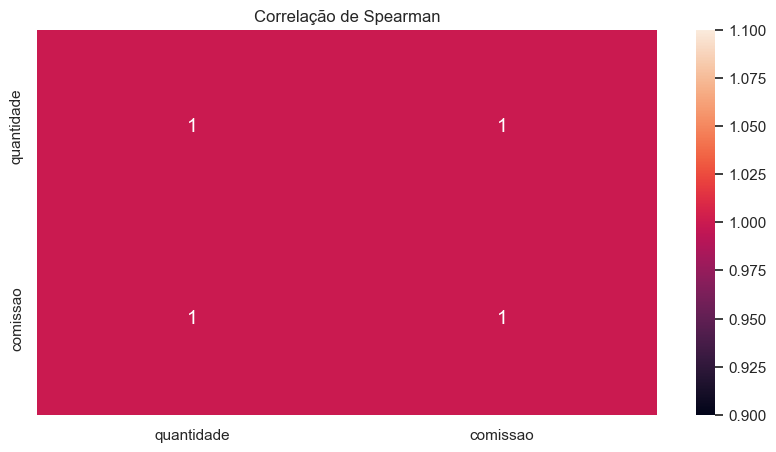

In [51]:
coef, p_value = stats.spearmanr(a=vendas.quantidade, b=vendas.comissao)
print(f'Coeficiente de Correlação: {coef}')
print(f'p_value : {p_value}')

correlacoes = vendas.corr(method='spearman')
plt.figure()
sns.heatmap(correlacoes, annot = True)
plt.title('Correlação de Spearman')
plt.show()

* Testando Regressão Linear

> 1. O gráfico de dispersão nos mostra uma reta não linear, entretanto, ela se aproxima de uma. Por conta disso, vale a pena testarmos uma Regressão Linear 


In [52]:
import statsmodels.formula.api as smf 
import statsmodels.stats.api as sms 

regressao = smf.ols('comissao ~ quantidade', data = vendas).fit()
residuos = regressao.resid

print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               comissao   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1016.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           5.98e-34
Time:                        21:27:29   Log-Likelihood:                -387.21
No. Observations:                  50   AIC:                             778.4
Df Residuals:                      48   BIC:                             782.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -626.0000    163.662     -3.825      0.0

> 1. O R-Squared está com 95% de ajuste, ou seja, o modelo se ajusta bem a uma regressão linear. 

> 2. A Prob F-Statistic está menor que 5%, ou seja, o modelo está bem ajustado. 

> 3. O p_value está menor que 0.05, ou seja, o modelo está bem ajustado. 

> 4. Estatística t está ajustada.

    * H0: Coeficiente = 0: p_value > 0.05 -> coeficiente não validado

    * H1: Coeficiente != 0: p_value <= 0.05 -> coeficiente validado

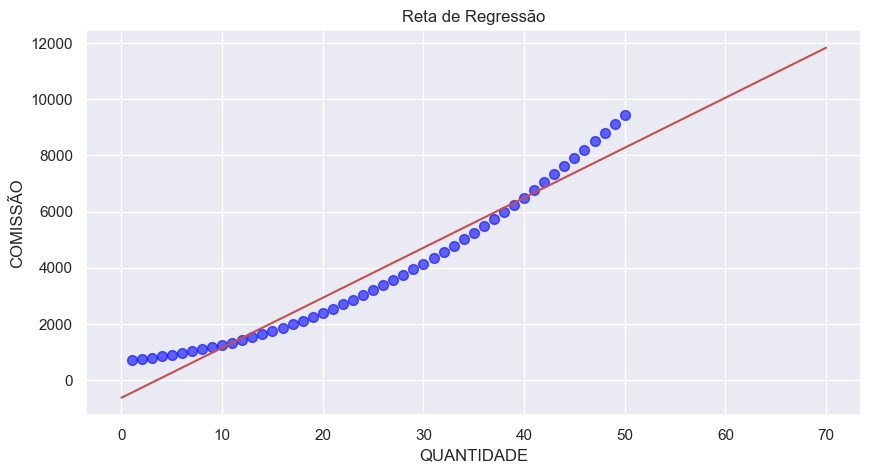

In [53]:
plt.scatter(y = vendas.comissao, x = vendas.quantidade, color = 'blue', s = 50, alpha = 0.6)
x_plot = np.linspace(0, 70)
plt.plot(x_plot, regressao.params[0]+ x_plot*regressao.params[1] , color = 'r')
plt.title('Reta de Regressão')
plt.ylabel('COMISSÃO')
plt.xlabel('QUANTIDADE')
plt.grid(True)
plt.show()

> 1. Qual o problema dessa regressão linear? Note que o Intercepto é um valor negativo, ou seja, o funcionário sempre perderia dinheiro, independentemente se vender 0 ou quantos produtos forem.

> 2. Nesse âmbito, fica claro que nossa regressão, embora passe nos testes realizados, não possui "sentido" matematicamente e nem para o viés de negócio.

* Regreessão Polinomial com Numpy - Grau 2

> 1. y = b0 + b1.x + b2.x^2

[  3.  25. 700.]
Coeficiente que multiplica o X^2: 3 |  Coeficiente que multiplica o X: 25 | Intercepto: 700

Comissao = 3*quantidade^2+ 25*quantidade + 700

[ 728.  762.  802.  848.  900.  958. 1022. 1092. 1168. 1250. 1338. 1432.
 1532. 1638. 1750. 1868. 1992. 2122. 2258. 2400. 2548. 2702. 2862. 3028.
 3200. 3378. 3562. 3752. 3948. 4150. 4358. 4572. 4792. 5018. 5250. 5488.
 5732. 5982. 6238. 6500. 6768. 7042. 7322. 7608. 7900. 8198. 8502. 8812.
 9128. 9450.]



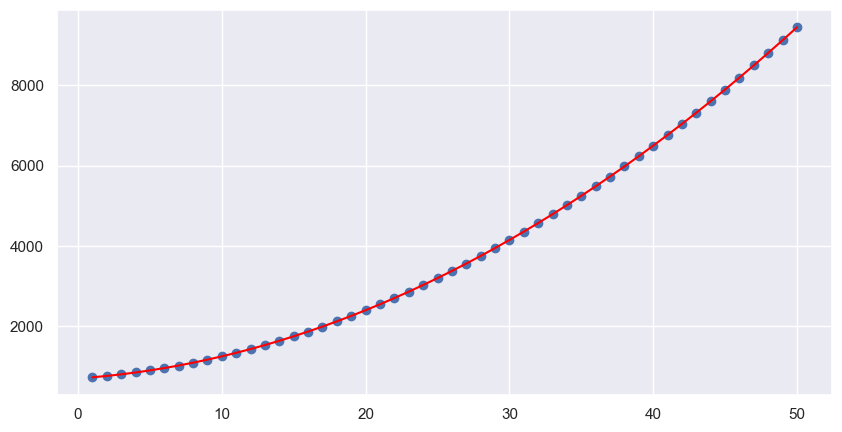

In [54]:
modelo2 = np.poly1d(np.polyfit(vendas.quantidade, vendas.comissao, 2))
print(modelo2.coef)
print(f'Coeficiente que multiplica o X^2: {round(modelo2.coef[0])} |  Coeficiente que multiplica o X: {round(modelo2.coef[1])} | Intercepto: {round(modelo2.coef[2])}')
print()
print(f'Comissao = {round(modelo2.coef[0])}*quantidade^2+ {round(modelo2.coef[1])}*quantidade + {round(modelo2.coef[2])}')
print()
y2 = modelo2(vendas.quantidade)
print(y2)
print()
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade, y2, color = 'red')
plt.grid(True)
plt.show()

* Regressão Polinomial com Numpy - Grau 3

> 1. y = b0 + b1.x + b2.x^3 

[ -0.   3.  25. 700.]
Coeficiente que multiplica o X^3: -1.0860694586005637e-16 | Coeficiente que multiplica o X^2: 3.000000000000008 |  Coeficiente que multiplica o X: 24.99999999999987 | Intercepto: 700.0000000000011

Comissao = -1.0860694586005637e-16*quantidade^3 + 3.000000000000008*quantidade^2 + 24.99999999999987*quantidade + 700.0000000000011

[ 728.  762.  802.  848.  900.  958. 1022. 1092. 1168. 1250. 1338. 1432.
 1532. 1638. 1750. 1868. 1992. 2122. 2258. 2400. 2548. 2702. 2862. 3028.
 3200. 3378. 3562. 3752. 3948. 4150. 4358. 4572. 4792. 5018. 5250. 5488.
 5732. 5982. 6238. 6500. 6768. 7042. 7322. 7608. 7900. 8198. 8502. 8812.
 9128. 9450.]



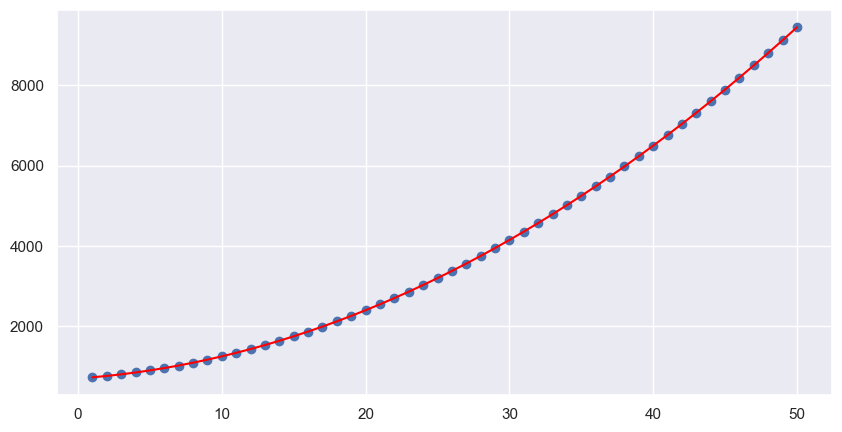

In [55]:
modelo3 = np.poly1d(np.polyfit(vendas.quantidade, vendas.comissao, 3))
print(modelo3.coef)
print(f'Coeficiente que multiplica o X^3: {modelo3.coef[0]} | Coeficiente que multiplica o X^2: {modelo3.coef[1]} |  Coeficiente que multiplica o X: {modelo3.coef[2]} | Intercepto: {modelo3.coef[3]}')
print()
print(f'Comissao = {modelo3.coef[0]}*quantidade^3 + {modelo3.coef[1]}*quantidade^2 + {modelo3.coef[2]}*quantidade + {modelo3.coef[3]}')
print()
y3 = modelo3(vendas.quantidade)
print(y3)
print()
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade, y3, color = 'red')
plt.grid(True)
plt.show()

* Regressão Polinomial com Sklearn

In [56]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
print('Variável X')
x = vendas[['quantidade']]
display(x.head())
display(x.tail())
print()
print('Variável Y')
y = vendas.comissao 
print(y.head())
print()

print('Preprocessing')
pre_process = PolynomialFeatures(degree = 2)
x_polinomial = pre_process.fit_transform(x)
x_polinomial

Variável X


,quantidade
0,1
1,2
2,3
3,4
4,5


,quantidade
45,46
46,47
47,48
48,49
49,50



Variável Y
0   728.00
1   762.00
2   802.00
3   848.00
4   900.00
Name: comissao, dtype: float64

Preprocessing


array([[   1.,    1.,    1.],
       [   1.,    2.,    4.],
       [   1.,    3.,    9.],
       [   1.,    4.,   16.],
       [   1.,    5.,   25.],
       [   1.,    6.,   36.],
       [   1.,    7.,   49.],
       [   1.,    8.,   64.],
       [   1.,    9.,   81.],
       [   1.,   10.,  100.],
       [   1.,   11.,  121.],
       [   1.,   12.,  144.],
       [   1.,   13.,  169.],
       [   1.,   14.,  196.],
       [   1.,   15.,  225.],
       [   1.,   16.,  256.],
       [   1.,   17.,  289.],
       [   1.,   18.,  324.],
       [   1.,   19.,  361.],
       [   1.,   20.,  400.],
       [   1.,   21.,  441.],
       [   1.,   22.,  484.],
       [   1.,   23.,  529.],
       [   1.,   24.,  576.],
       [   1.,   25.,  625.],
       [   1.,   26.,  676.],
       [   1.,   27.,  729.],
       [   1.,   28.,  784.],
       [   1.,   29.,  841.],
       [   1.,   30.,  900.],
       [   1.,   31.,  961.],
       [   1.,   32., 1024.],
       [   1.,   33., 1089.],
       [  

In [57]:
modelo_sk = LinearRegression()
modelo_sk.fit(x_polinomial, y)

y_pred = modelo_sk.predict(x_polinomial)
y_pred

array([ 728.,  762.,  802.,  848.,  900.,  958., 1022., 1092., 1168.,
       1250., 1338., 1432., 1532., 1638., 1750., 1868., 1992., 2122.,
       2258., 2400., 2548., 2702., 2862., 3028., 3200., 3378., 3562.,
       3752., 3948., 4150., 4358., 4572., 4792., 5018., 5250., 5488.,
       5732., 5982., 6238., 6500., 6768., 7042., 7322., 7608., 7900.,
       8198., 8502., 8812., 9128., 9450.])

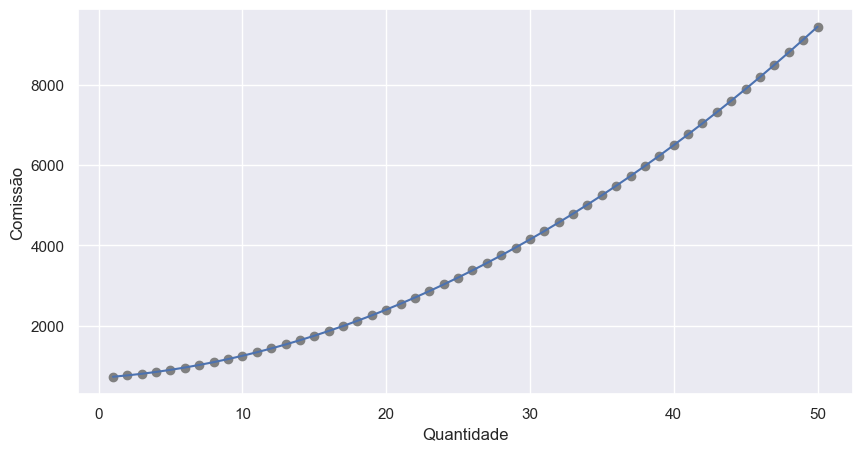

In [58]:
plt.scatter(x, y, c = 'gray')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.plot(x, y_pred)

In [59]:
print(modelo_sk.intercept_)
print(modelo_sk.coef_)

print(f'Comissao = {modelo_sk.intercept_} + {modelo_sk.coef_[1]} *quantidade + {modelo_sk.coef_[2]}*quantidade^2')

700.0000000000059
[ 0. 25.  3.]
Comissao = 700.0000000000059 + 24.999999999999638 *quantidade + 3.0000000000000036*quantidade^2


In [60]:
quantidade = 60
previsao = modelo_sk.predict(pre_process.fit_transform([[quantidade]]))
print(f'Se vender {quantidade}, o funcionário ganhará {previsao[0]} reais de comissão')

Se vender 60, o funcionário ganhará 12999.999999999996 reais de comissão


# <font color='red' style='font-size: 40px;'>5.0 Regressão Quantílica </font>
<hr style='border: 2px solid red;'>



## 5.1) Regressão Quantílica 

> 1. É um complemento para a Regressão Linear.

> 2. Indicada quando existe Outliers e Não há Homocedasticidade nos Resíduos.

> 3. Utiliza os quantis como referência, pois a média não descreve toda a Distribuição, como no caso da regressão Linear.

> 4. Variável dependente contínua.

> 5. O objetivo é estimar um determinado quantil da variável dependente. 

# $$ Y_i = b.X_i + e $$

<img src = '../Resumo_Estatistica_Matematica//img58.png' width = '70%'>

* Importando os Dados

In [61]:
gasto = pd.read_excel('../Resumo_Estatistica_Matematica/gasto_almoco.xlsx')
print(gasto.shape)
print(gasto.dtypes)
gasto.head()

(64, 4)
dia                 int64
gasto_dia_reais     int64
num_refeicoes       int64
gasto_acum_reais    int64
dtype: object


,dia,gasto_dia_reais,num_refeicoes,gasto_acum_reais
0,1,26,1,26
1,2,18,2,44
2,3,37,3,81
3,4,21,4,102
4,5,39,5,141


* Valores Missing 

In [62]:
gasto.isnull().sum()

dia                 0
gasto_dia_reais     0
num_refeicoes       0
gasto_acum_reais    0
dtype: int64

* Análise da Correlação Linear 

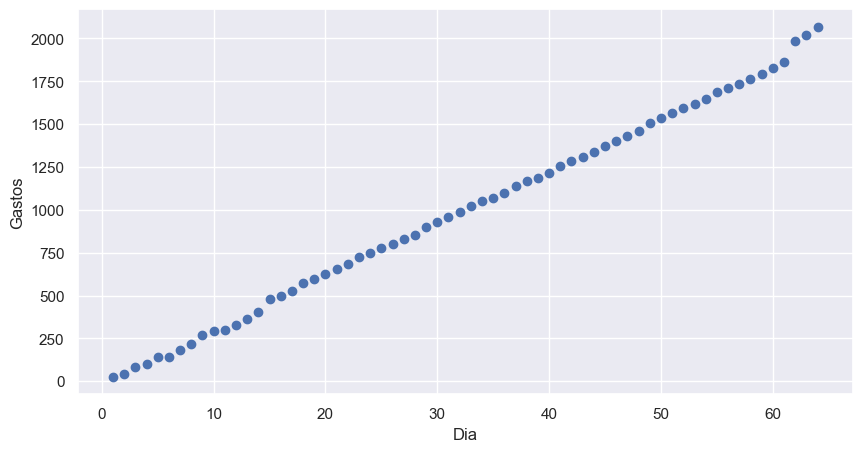

In [63]:
plt.scatter(gasto.dia, gasto.gasto_acum_reais)
plt.xlabel('Dia')
plt.ylabel('Gastos')
plt.grid(True)
plt.show()

* Análise da Normalidade 

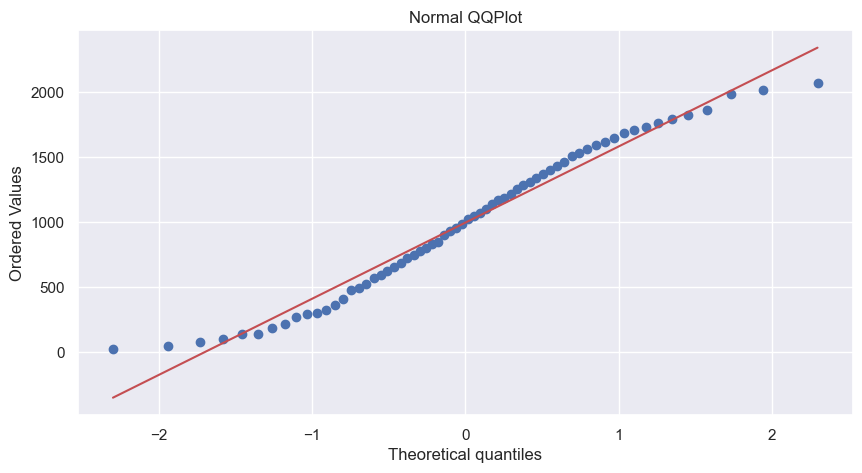

In [64]:
import scipy.stats as stats 
stats.probplot(gasto['gasto_acum_reais'], dist = 'norm', plot = plt)
plt.title('Normal QQPlot')
plt.show()

In [65]:
estatistica, p_value = stats.shapiro(gasto.gasto_acum_reais)
print(f'Estatística do Teste: {estatistica}')
print(f'p_value : {p_value}')

Estatística do Teste: 0.9621436595916748
p_value : 0.047125596553087234


* Análise da Correlação 

> 1. Pelo fato do p_valor ter dado menor que 0.05, a distribuição não é normal 


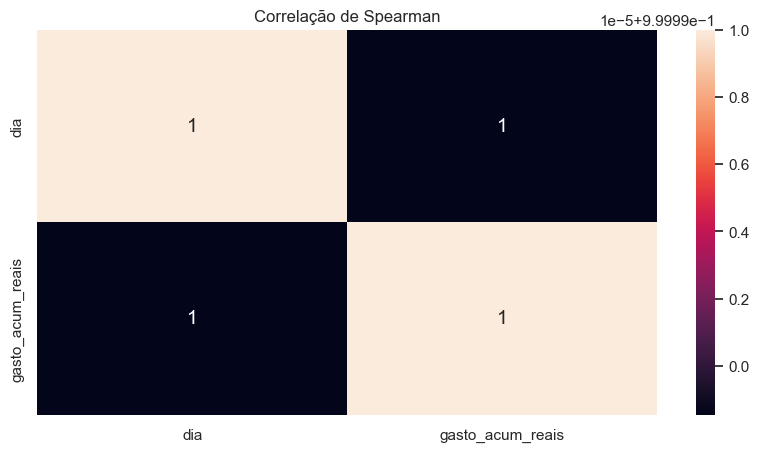

In [66]:
correlacoes = gasto[['dia', 'gasto_acum_reais']].corr(method='spearman')
plt.figure()
sns.heatmap(correlacoes, annot = True)
plt.title('Correlação de Spearman')
plt.show()

* Modelo de Regressão Linear 

In [67]:
import statsmodels.stats.api as sms 

regressao_linear = smf.ols('gasto_acum_reais ~ dia', data = gasto).fit()
residuos = regressao_linear.resid

* Teste de Normalidade dos Resíduos 

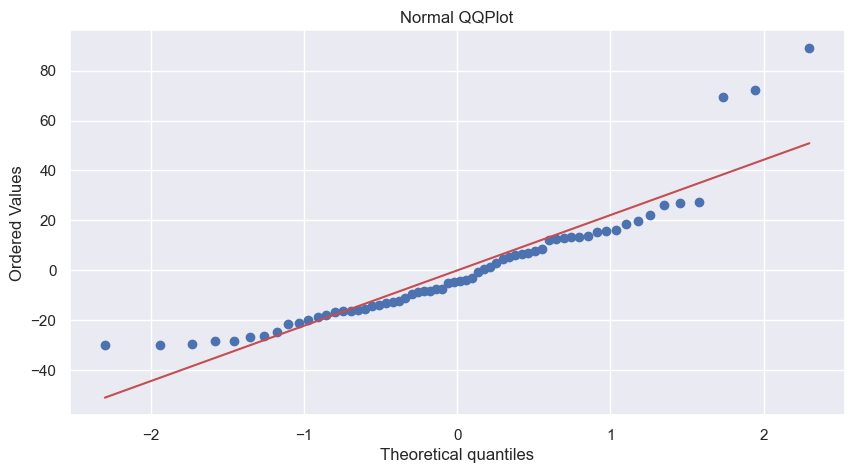

In [68]:
stats.probplot(residuos, dist = 'norm', plot = plt)
plt.title('Normal QQPlot')
plt.show()

In [69]:
estatistica, p_value = stats.shapiro(residuos)
print(f'Estatística do Teste: {estatistica}')
print(f'p_value : {p_value}')

Estatística do Teste: 0.8646502494812012
p_value : 4.71544126412482e-06


> 1. Distribuição não normal 

* Análise da Homocedasticidade dos Resíduos 

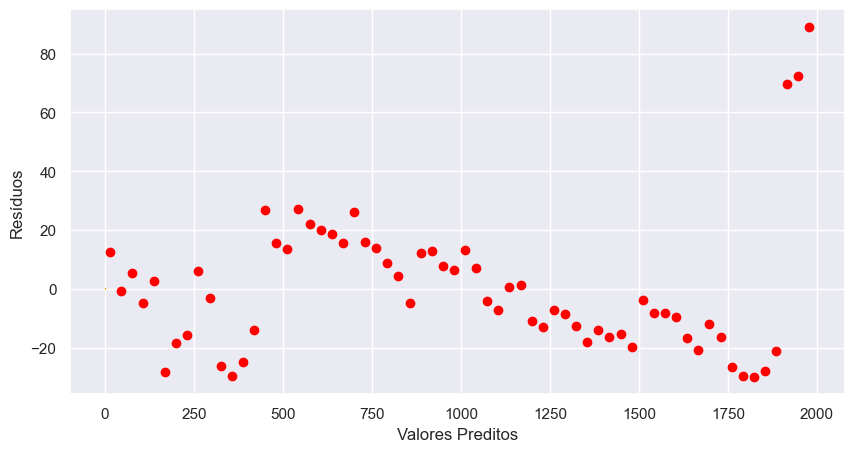

In [70]:
plt.scatter(y = residuos, x = regressao_linear.predict(), color = 'red')
plt.hlines(y = 0, xmin = 0, xmax= 4, color = 'orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

In [71]:
estatistica, p_value, f_value, fp_value = sms.het_breuschpagan(regressao_linear.resid, regressao_linear.model.exog)
print(f'Estatística de Teste : {estatistica}')
print(f'p_value : {p_value}')
print(f'f_value : {f_value}')
print(f'fp_value : {fp_value}')


Estatística de Teste : 8.551798019780392
p_value : 0.003451811166879094
f_value : 9.562284407626597
fp_value : 0.0029756698764909014


In [72]:
estatistica, p_value, f_value, fp_value = sms.het_breuschpagan(regressao_linear.resid, regressao_linear.model.exog)
print(f'Estatística de Teste : {estatistica}')
print(f'p_value : {p_value}')
print(f'f_value : {f_value}')
print(f'fp_value : {fp_value}')


Estatística de Teste : 8.551798019780392
p_value : 0.003451811166879094
f_value : 9.562284407626597
fp_value : 0.0029756698764909014


> 1. Não existe Homocedasticidade pois o p_value é menor que 0.05 

* Análise de Outliers dos Resíduos 

> 1. Devem estar entre -3 e 3. 

In [73]:
outliers = regressao_linear.outlier_test()
print(outliers.max())
print(outliers.min())

student_resid   4.46
unadj_p         0.98
bonf(p)         1.00
dtype: float64
student_resid   -1.31
unadj_p          0.00
bonf(p)          0.00
dtype: float64


> 1. Possuem Outliers, no caso, Outlier Superior pois o student_resid foi bem maior que 4.45 

* Regressão Quantílica 

> 1. Devido da variável dependente não seguir distribuição normal, os resíduos não seguirem distribuição normal, não haver homocedasticidade nos resíduos e terem Outliers também nos resíduos, devemos optar pela Regressão Quantílica. 

In [74]:
modelo1 = smf.quantreg('gasto_acum_reais ~ dia', gasto)
resultado = modelo1.fit(q = 0.25)
print(resultado.summary())

                         QuantReg Regression Results                          
Dep. Variable:       gasto_acum_reais   Pseudo R-squared:               0.9705
Model:                       QuantReg   Bandwidth:                       19.83
Method:                 Least Squares   Sparsity:                        52.15
Date:                Mon, 24 Oct 2022   No. Observations:                   64
Time:                        21:27:31   Df Residuals:                       62
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7143      6.536     -3.322      0.002     -34.780      -8.648
dia           30.9286      0.181    171.127      0.000      30.567      31.290


gasto_acum = -21.7143 + 30.9286 * dia 

In [75]:
modelo2 = smf.quantreg('gasto_acum_reais ~ dia', gasto)
resultado = modelo2.fit(q = 0.50)
print(resultado.summary())

                         QuantReg Regression Results                          
Dep. Variable:       gasto_acum_reais   Pseudo R-squared:               0.9691
Model:                       QuantReg   Bandwidth:                       19.52
Method:                 Least Squares   Sparsity:                        43.96
Date:                Mon, 24 Oct 2022   No. Observations:                   64
Time:                        21:27:31   Df Residuals:                       62
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.0313      5.560     -1.445      0.154     -19.145       3.082
dia           30.7813      0.149    206.976      0.000      30.484      31.079


gasto_acum = -8.0313 + 30.7813 * dia 

In [76]:
modelo3 = smf.quantreg('gasto_acum_reais ~ dia', gasto)
resultado = modelo3.fit(q = 0.75)
print(resultado.summary())

                         QuantReg Regression Results                          
Dep. Variable:       gasto_acum_reais   Pseudo R-squared:               0.9624
Model:                       QuantReg   Bandwidth:                       15.65
Method:                 Least Squares   Sparsity:                        45.18
Date:                Mon, 24 Oct 2022   No. Observations:                   64
Time:                        21:27:31   Df Residuals:                       62
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4074      4.735      2.831      0.006       3.942      22.873
dia           30.4815      0.124    246.731      0.000      30.235      30.728


gasto_acum = 13.4074 + 30.4815 * dia 

# <font color='red' style='font-size: 40px;'>6.0 Regularização - Regressão Ridge, Lasso e Elastic Net  </font>
<hr style='border: 2px solid red;'>



> CONSULTAR:

https://medium.com/@gs.franco/modelos-lineares-regularizados-a00538070202

https://towardsdatascience.com/the-game-of-regularization-91442b3be862

https://medium.com/@zxr.nju/the-classical-linear-regression-model-is-good-why-do-we-need-regularization-c89dba10c8eb

https://medium.com/turing-talks/turing-talks-20-regress%C3%A3o-de-ridge-e-lasso-a0fc467b5629

https://medium.com/data-hackers/o-que-%C3%A9-regulariza%C3%A7%C3%A3o-l1-l2-6697ada36a51

https://medium.com/@jackelinegleme/regulariza%C3%A7%C3%A3o-lasso-l1-e-ridge-l2-a12efacc5fb3

https://www.youtube.com/watch?v=CJ2pi1Iw0JI&ab_channel=CanaldaEngenhariadeManufaturaeQualidade

https://www.youtube.com/watch?v=NGf0voTMlcs&ab_channel=StatQuestwithJoshStarmer

https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer

## 6.1) Conceitos Fundamentais 

> 1. A regularização em machine learning é uma técnica que a gente usa para evitar o overfitting, evitar que o modelo se ajuste demais aos dados de treino e não consiga fazer previsões com novos dados (quando ele entrar em produção).

> 2. De forma simples e direta, o que o modelo de Machine Learning faz é encontrar padrões nos dados históricos para aí tentar fazer previsões quando surgirem novos dados. O problema é que às vezes o modelo é tão complexo e tenta fazer previsões tão precisas que ele se ajusta quase que perfeitamente aos dados de treino, considerando no seu aprendizado até mesmo os ruídos. Seria como se o seu modelo decorasse os dados de treinamento, mas não realmente aprendesse o comportamento médio daquelas observações. 

> 3. Isso é bastante comum em modelos deep learning mais complexos. Aí quando isso acontece, seu modelo não vai conseguir fazer boas previsões em novos dados, ele não consegue generalizar o aprendizado e temos um problema. Para resolver este problema, aparece a regularização. 

> 4. A regularização é uma forma de controlar a complexidade do modelo, ela adiciona um termo de penalidade à função de custo usada durante o treinamento. Então imagina assim, o seu modelo de Machine Learning busca minimizar ao máximo a função custo e pode até mesmo minimizar demais, caindo no overfitting, que acabamos de explicar. Essa penalidade vai evitar que essa minimização passe do ponto "saudável" e vai meio que corrigir o aprendizado. Esse termo adicionado pela regularização vai penalizar coeficientes grandes ou desnecessários, fazendo com que o modelo tenha soluções mais simples e assim realmente aprenda o comportamento dos seus dados, não apenas decorando algo que não vai ser extrapolado. 

> 5. Em Modelos Lineares, como uma Regressão, pode-se aplicar processos de Regularização (Regressão Lasso, Regressão Ridge e Regressão Elastic Net) como uma forma de se comprometer entre encontrar pequenos pesos e minimizar a função de custo original. Em suma, a regularização vai tentar evitar que um modelo se ajuste demais aos dados de treinamento, melhorando sua capacidade de generalização para novos dados. 

> 6. A regularização é importante principalmente para lidar com bastante variáveis para determinar os melhores parâmetros num aprendizado de máquina, onde a ideia é deixar menos propenso ao overfitting. De uma maneira bem direta, podemos entender regularização como a inserção de viés em um modelo. Ou em outras palavras, essa técnica desencoraja o ajuste excessivo dos dados, afim de diminuir a sua variância.

> 7. São ideais para tratar problemas com variáveis independentes com alta multicolinearidade.

<img src = './img609.jpg' width = '70%'>
<img src = './img529.png' width = '70%'>
<img src = './img538.png' width = '70%'>

## 6.2) Regressão Lasso

> 1. Basicamente, utiliza-se a minimização da Função Custo aliada a aplicação de penalidades nos erros. 

> 2. Ela codifica os modelos de overfitting e underfitting adicionando penalidade equivalente à soma dos valores absolutos dos coeficientes.

> 3. Realiza a minimização de coeficientes, ou seja, minimiza os resíduos quadrados, mas em vez de elevar ao quadrado as magnitudes dos coeficientes, ela pega os valores verdadeiros dos coeficientes. Isso significa que a soma dos coeficientes também pode ser 0, devido à presença de coeficientes negativos.

> 4. O ponto positivo é que esse tipo de regularização ajuda a eliminar os recursos que não vão ser importantes para o modelo. Então, L1 faz a seleção de recursos decidindo quais recursos são essenciais para previsão e quais não são.

> 5. A regularização L1 adiciona o termo de penalidade na função custo adicionando o valor absoluto dos parâmetros Wj. Por isso, tem-se que se preocupar com o Alfa da equação, pois é o que controla a penalidade. Vai ser sempre uma constante no alfa (ou lambda) e pode-se chegar a zero.

    - α > 0: Aumentando o número de coeficientes eliminados. Quanto mais alto, maior o viés e menor a variância.

    - α = 0: Não tem parâmetro eliminado.

<img src = '../Resumo_Estatistica_Matematica//img62.png' width = '70%'>
<img src = './img530.png' width = '70%'>
<img src = './img535.png' width = '70%'>
<img src = './img539.png' width = '70%'>

## 6.3) Regressão Ridge

> 1. Funciona de modo semelhante a função lasso, porém, na regressão ridge, o termo de penalização da função de perda é a magnitude quadrática do coeficiente.

> 2. A Regressão Ridge adiciona o valor quadrado de Wj na função custo. Temos o parâmetro Alfa que penaliza os coeficientes que assumem valores muito grandes, então o valor de Alfa vai tender a zero, porém nunca vai ser igual a zero.

<img src = '../Resumo_Estatistica_Matematica//img63.png' width = '70%'>
<img src = './img531.png' width = '70%'>
<img src = './img536.png' width = '70%'>
<img src = './img540.png' width = '70%'>

## 6.4) Regressão Elastic Net

<img src = '../Resumo_Estatistica_Matematica//img64.png' width = '70%'>


## 6.5) Diferenças entre as Regularizações 

<img src = './img533.png' width = '70%'>
<img src = './img532.png' width = '70%'>
<img src = './img534.png' width = '70%'>

### Regressão Ridge - Objetivo: Criação de um modelo de regressão para variáveis com multicolinearidade 

* Importando os Dados 

In [77]:
gasto = pd.read_excel('../Resumo_Estatistica_Matematica/gasto_almoco.xlsx')
print(gasto.shape)
print(gasto.dtypes)
gasto.head()

(64, 4)
dia                 int64
gasto_dia_reais     int64
num_refeicoes       int64
gasto_acum_reais    int64
dtype: object


,dia,gasto_dia_reais,num_refeicoes,gasto_acum_reais
0,1,26,1,26
1,2,18,2,44
2,3,37,3,81
3,4,21,4,102
4,5,39,5,141


* Valores Missing 

In [78]:
gasto.isnull().sum()

dia                 0
gasto_dia_reais     0
num_refeicoes       0
gasto_acum_reais    0
dtype: int64

* Análise de Correlação 

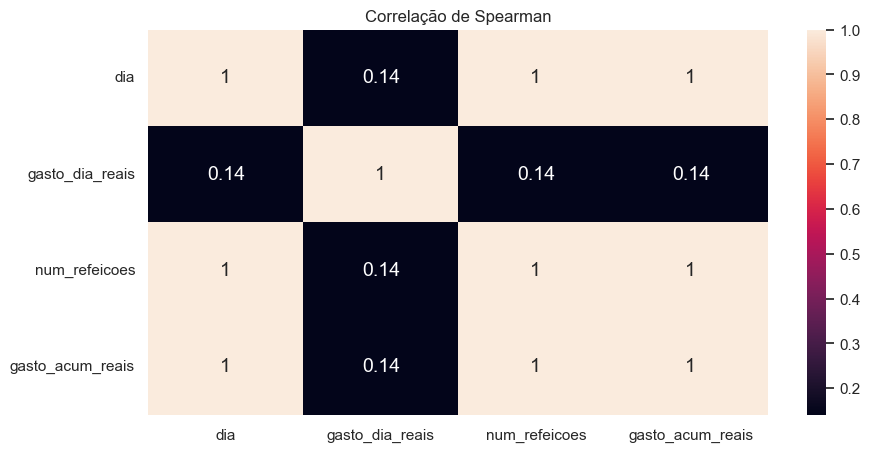

In [79]:
correlacoes = gasto.corr(method='spearman')
plt.figure()
sns.heatmap(correlacoes, annot = True)
plt.title('Correlação de Spearman')
plt.show()

* Analise de Variância 

# $$ VIF_j = \frac {1} {1 - {R_j}^2} $$

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif = add_constant (gasto) # Função espera a presença de uma constante na matriz de variáveis explicativas
pd.Series([variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])], index = vif.columns)

const                11.76
dia                 836.17
gasto_dia_reais       1.40
num_refeicoes      2777.88
gasto_acum_reais   3306.05
dtype: float64

* Modelo Ridge 

In [81]:
gasto1 = gasto.drop('gasto_dia_reais', axis = 1)

x = gasto1.iloc[:, 0:2].values 
y = gasto1.iloc[:, 2].values 

In [82]:
from sklearn.linear_model import Ridge 

# Deve-se escolher o melhor parâmetro de regularização (alpha)
modelo_ridge = Ridge(alpha = 0)
modelo_ridge.fit(x, y)
modelo_ridge.score(x, y)

0.9996807593215069

In [83]:
print(modelo_ridge.intercept_)
print(modelo_ridge.coef_)

2.6345750647848263
[ 4.89145178 25.63954273]


gasto_acum = 2.6346 + 4.8915*dia + 25.6395.num_refeicoes 

In [84]:
previsao1 = modelo_ridge.predict(x)
gasto1['previsao_ridge'] = previsao1
gasto1['erro_abs_ridge'] = abs(gasto1.gasto_acum_reais - gasto1.previsao_ridge)
gasto1.head()

,dia,num_refeicoes,gasto_acum_reais,previsao_ridge,erro_abs_ridge
0,1,1,26,33.17,7.17
1,2,2,44,63.70,19.70
2,3,3,81,94.23,13.23
3,4,4,102,124.76,22.76
4,5,5,141,155.29,14.29


In [85]:
gasto1.describe()

,dia,num_refeicoes,gasto_acum_reais,previsao_ridge,erro_abs_ridge
count,64.00,64.00,64.00,64.00,64.00
mean,32.50,32.55,996.09,996.09,8.81
std,18.62,19.12,581.35,581.26,5.39
min,1.00,1.00,26.00,33.17,0.41
25%,16.75,16.75,518.75,514.03,4.80
50%,32.50,32.50,1006.00,994.89,8.42
75%,48.25,48.25,1471.75,1475.76,12.14
max,64.00,68.00,2068.00,2059.18,22.76


* Métricas 

In [86]:
# MAE

from sklearn.metrics import mean_absolute_error

mean_absolute_error(gasto1.gasto_acum_reais, gasto1.previsao_ridge)

8.807401102211166

In [87]:
# MSE

from sklearn.metrics import mean_squared_error
mean_squared_error(gasto1.gasto_acum_reais, gasto1.previsao_ridge)

106.20834811864478

### Regressão Lasso - Objetivo: Criação de um modelo de regressão para variáveis com multicolinearidade 

* Modelo Lasso 

In [88]:
x = gasto1.iloc[:, 0:2].values 
y = gasto1.iloc[:, 2].values 

In [89]:
from sklearn.linear_model import Lasso 

# Deve-se escolher o melhor parâmetro de regularização (alpha)
modelo_lasso = Lasso(alpha = 28)
modelo_lasso.fit(x, y)
modelo_lasso.score(x, y)

0.9996550235468806

In [90]:
print(modelo_lasso.intercept_)
print(modelo_lasso.coef_)

2.4884777044607063
[ 8.09213073 22.44796231]


gasto_acum = 2.4885 + 8.0921 * dia + 22.4480 * num_refeicoes 

In [91]:
previsao2 = modelo_lasso.predict(x)
gasto1['previsao_lasso'] = previsao2
gasto1['erro_abs_lasso'] = abs(gasto1.gasto_acum_reais - gasto1.previsao_lasso)
gasto1.head()

,dia,num_refeicoes,gasto_acum_reais,previsao_ridge,erro_abs_ridge,previsao_lasso,erro_abs_lasso
0,1,1,26,33.17,7.17,33.03,7.03
1,2,2,44,63.70,19.70,63.57,19.57
2,3,3,81,94.23,13.23,94.11,13.11
3,4,4,102,124.76,22.76,124.65,22.65
4,5,5,141,155.29,14.29,155.19,14.19


In [92]:
gasto1.describe()

,dia,num_refeicoes,gasto_acum_reais,previsao_ridge,erro_abs_ridge,previsao_lasso,erro_abs_lasso
count,64.00,64.00,64.00,64.00,64.00,64.00,64.00
mean,32.50,32.55,996.09,996.09,8.81,996.09,8.98
std,18.62,19.12,581.35,581.26,5.39,579.80,5.88
min,1.00,1.00,26.00,33.17,0.41,33.03,0.23
25%,16.75,16.75,518.75,514.03,4.80,514.04,4.67
50%,32.50,32.50,1006.00,994.89,8.42,995.04,7.91
75%,48.25,48.25,1471.75,1475.76,12.14,1476.05,12.41
max,64.00,68.00,2068.00,2059.18,22.76,2046.85,22.65


* Métricas 

In [93]:
# MAE

from sklearn.metrics import mean_absolute_error

mean_absolute_error(gasto1.gasto_acum_reais, gasto1.previsao_lasso)

8.98345767091611

In [94]:
# MSE

from sklearn.metrics import mean_squared_error
mean_squared_error(gasto1.gasto_acum_reais, gasto1.previsao_lasso)

114.77039642502189

### Regressão Elastic Net - Objetivo: Criação de um modelo de regressão para variáveis com multicolinearidade 

* Modelo Elastic Net 

In [95]:
x = gasto1.iloc[:, 0:2].values 
y = gasto1.iloc[:, 2].values 

In [96]:
from sklearn.linear_model import ElasticNet 

# Deve-se escolher o melhor parâmetro de regularização (alpha)
modelo_elasticnet = ElasticNet(alpha = 0.0001, l1_ratio= 0.9999)
modelo_elasticnet.fit(x, y)
modelo_elasticnet.score(x, y)

c:\Users\leova\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.757e+03, tolerance: 2.129e+03
  model = cd_fast.enet_coordinate_descent(


0.9996471290921038

In [97]:
print(modelo_elasticnet.intercept_)
print(modelo_elasticnet.coef_)

-0.9110307878519279
[ 9.12877264 21.51726303]


gasto_acum = -0.9111 + 9.1289 * dia + 21.5171 * num_refeicoes 

In [98]:
previsao3 = modelo_elasticnet.predict(x)
gasto1['previsao_elasticnet'] = previsao3
gasto1['erro_abs_elasticnet'] = abs(gasto1.gasto_acum_reais - gasto1.previsao_elasticnet)
gasto1.head()

,dia,num_refeicoes,gasto_acum_reais,previsao_ridge,erro_abs_ridge,previsao_lasso,erro_abs_lasso,previsao_elasticnet,erro_abs_elasticnet
0,1,1,26,33.17,7.17,33.03,7.03,29.74,3.74
1,2,2,44,63.70,19.70,63.57,19.57,60.38,16.38
2,3,3,81,94.23,13.23,94.11,13.11,91.03,10.03
3,4,4,102,124.76,22.76,124.65,22.65,121.67,19.67
4,5,5,141,155.29,14.29,155.19,14.19,152.32,11.32


In [99]:
gasto1.describe()

,dia,num_refeicoes,gasto_acum_reais,previsao_ridge,erro_abs_ridge,previsao_lasso,erro_abs_lasso,previsao_elasticnet,erro_abs_elasticnet
count,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00
mean,32.50,32.55,996.09,996.09,8.81,996.09,8.98,996.09,9.24
std,18.62,19.12,581.35,581.26,5.39,579.80,5.88,581.29,5.70
min,1.00,1.00,26.00,33.17,0.41,33.03,0.23,29.74,0.79
25%,16.75,16.75,518.75,514.03,4.80,514.04,4.67,512.41,4.46
50%,32.50,32.50,1006.00,994.89,8.42,995.04,7.91,995.09,7.91
75%,48.25,48.25,1471.75,1475.76,12.14,1476.05,12.41,1477.76,13.06
max,64.00,68.00,2068.00,2059.18,22.76,2046.85,22.65,2046.50,22.05


* Métricas 

In [100]:
# MAE

from sklearn.metrics import mean_absolute_error

mean_absolute_error(gasto1.gasto_acum_reais, gasto1.previsao_elasticnet)

9.241924647701296

In [101]:
# MSE

from sklearn.metrics import mean_squared_error
mean_squared_error(gasto1.gasto_acum_reais, gasto1.previsao_elasticnet)

117.39680670923445

### Resultados: 

> 1. Pelos valores de MAE e MSE para cada um dos modelos, o que melhor se saiu nessa base de dados foi o Modelo Ridge 

# <font color='red' style='font-size: 40px;'>7.0 Previsão de Preços de Casa </font>
<hr style='border: 2px solid red;'>

> CONSULTAR: 

https://www.youtube.com/watch?v=s2drgo58G2c&list=PLwnip85KhroXnYqk_ske2o3TgnQrLbMU6&index=8&ab_channel=MarioFilho

# <font color='red' style='font-size: 40px;'>8.0 Previsão de Custo Médico </font>
<hr style='border: 2px solid red;'>

> CONSULTAR: 

https://www.kaggle.com/datasets/mirichoi0218/insurance